In [1]:
# Initialize Notebook
from IPython.core.display import HTML,Image
#%run ../library/v1.0.5/init.ipy
HTML('''<script> code_show=true;  function code_toggle() {  if (code_show){  $('div.input').hide();  } else {  $('div.input').show();  }  code_show = !code_show }  $( document ).ready(code_toggle); </script> <form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

In [2]:
import gc, argparse, sys, os, errno
from functools import reduce
import h5py
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_notebook, show
output_notebook()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.neighbors import NearestNeighbors
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])/255.
from bokeh.palettes import Category20c
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
sns.set_context(contexts[2])
sns.set_style(styles[0])
#plt.rc('font', family='serif')
#plt.rc('xtick', labelsize='x-small')
#plt.rc('ytick', labelsize='x-small')
#rcParams['font.weight'] = 'bold'
from ipywidgets import interact, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

## best_preprocess_methods

## 

In [3]:
cd /home/xieyufeng/ex

/home/xieyufeng/ex


In [4]:
dataset='scirep'
sequencing_type = 'short'

file_counts = 'output/'+dataset+'/summary/read_counts.txt'
file_length_path = 'output/'+dataset+'/stats/mapped_read_length_by_sample/'
file_length_path_insert = 'output/'+dataset+'/stats/mapped_insert_size_by_sample/'
plot_save_path = 'output/'+dataset+'/plots/'
if sequencing_type == 'short':
    exp_mx_name = 'domains_combined'
elif sequencing_type =='long':
    exp_mx_name = 'featurecounts'

In [5]:
import datetime
now = datetime.datetime.now()
timenow = '{}.{}.{}.{}:{}'.format(now.year,now.month,now.day,now.hour,now.minute)
savepath = 'output/candidate/'+dataset+'/'+timenow+'/'
if not os.path.exists(savepath):
    os.mkdir(savepath)

In [6]:
#小二－ 18. 三号－ 16. 小三－ 15. 四号－ 14. 小四－ 12. 五号－ 10.5 (pt)
# 72pt = 1in = 2.54cm
fonttitle = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 8}
fontlabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontticklabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontlegend = {'family':'Arial',
                  'weight' : 'normal', 
              #'linewidth':0.5,
                  'size' : 6.5}
fontcbarlabel = {'family':'Arial',
                 'weight' : 'normal', 
                 #'Rotation' : 270,
                 #'labelpad' : 25,
                 'size' : 6.5}
fontcbarticklabel = {'family':'Arial',#Helvetica
                 'weight' : 'normal', 
                 'size' : 5.5}
def std_plot(ax,xlabel,ylabel,title=None,
             legendtitle=None,bbox_to_anchor=None,
             labelspacing=1.2,borderpad=0,handletextpad=0,legendsort=True,markerscale=None,
             xlim=None,ylim=None,
             cbar=None,cbarlabel=None,
             moveyaxis=False,sns=False,left=True):
    #plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0','0.2','0.4','0.6','0.8','1.0'])
    pyplot.draw()
    #plt.figure(linewidth=30.5)
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xlabel(xlabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_ylabel(ylabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_xticklabels(ax.get_xticklabels(),fontticklabel)
    ax.set_yticklabels(ax.get_yticklabels(),fontticklabel)

    if moveyaxis is True:
        #fontticklabel字体会变
        ax.spines['left'].set_position(('data',0))
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(not left)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_color('k')
    
    ax.tick_params(direction='out', pad=-10)
    #ax.spines['bottom']._edgecolor="#000000"
    #ax.spines['left']._edgecolor="#000000"
    if title is not None:
        ax.set_title(title,fontdict = fonttitle)
    if legendtitle is not None:
        #if legendloc is None:
        #    legendloc="best"
        legend = ax.legend(title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
        ax.legend_.get_frame()._linewidth=0.5
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(6.5)
        if legendsort is True:
            # h: handle l:label
            h,l = ax.get_legend_handles_labels()
            l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h,l,title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)
        if sns is True:
            h,l = ax.get_legend_handles_labels()
            #l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h[1:],l[1:],title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)
    if xlim is not None:  
        ax.set(xlim=xlim)
    if ylim is not None:
        ax.set(ylim=ylim)
    if cbar is not None:
        #locator, formatter = cbar._get_ticker_locator_formatter()
        #ticks, ticklabels, offset_string = cbar._ticker(locator, formatter)
        #cbar.ax.spines['top'].set_visible(False)
        #cbar.ax.spines['right'].set_visible(False)
        #cbar.ax.spines['bottom'].set_visible(False)
        #cbar.ax.spines['left'].set_visible(False)
        cbar.ax.tick_params(direction='out', pad=3,width=0,length=0)
        cbar.set_label(cbarlabel,fontdict = fontcbarlabel,Rotation=270,labelpad=7.5)
        cbar.ax.set_yticks(cbar.ax.get_yticks())
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontcbarticklabel)
    return ax
def image_link(filename):
    fig.savefig(filename,dpi=300)
    return HTML('<a href="{0}" target="_blank" download="{0}">{0}</a>'.format(filename))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

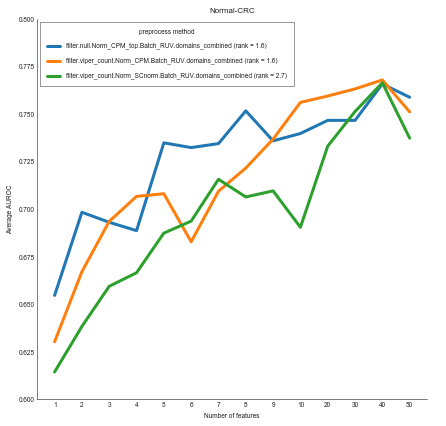

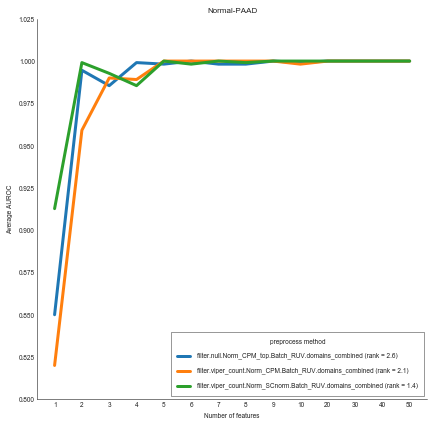

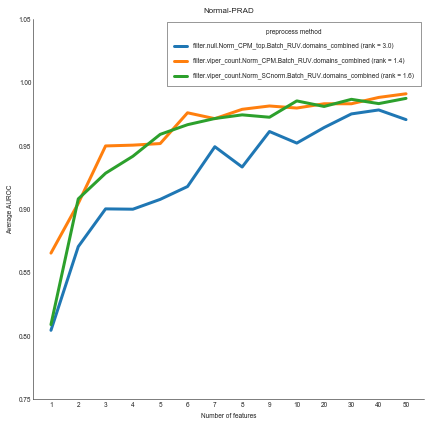

In [7]:
#use uca to presort methods
preselected_methods = np.loadtxt('output/'+dataset+'/select_preprocess_method/uca_score/'+exp_mx_name+'/selected_methods.txt',dtype='str')
preselected_methods_dir = np.array([preselected_methods[i]+'.'+exp_mx_name for i in range(preselected_methods.shape[0])])

def compare_preprocess_methods(output_dir, preselected_methods_dir, savepath=savepath,title=None,savefig=True):
    records = []
    pbar = tqdm(unit='directory')
    for preprocess_method in preselected_methods_dir:#os.listdir(output_dir):#
        for compare_group in os.listdir(os.path.join(output_dir, preprocess_method)):
            for feature_selection_method in os.listdir(os.path.join(output_dir, preprocess_method, compare_group)):
                classifier, n_select, select_method  = feature_selection_method.split('.')
                record = {
                    'compare_group': compare_group,
                    'classifier': classifier,
                    'n_features': n_select,
                    'preprocess_method': preprocess_method
                }
                try:
                    metrics = pd.read_table(os.path.join(output_dir,
                        preprocess_method, compare_group, feature_selection_method,
                        'metrics.txt'))
                except:
                    continue
                record['test_roc_auc_mean'] = metrics['test_roc_auc'].mean()
                pbar.update(1)
                records.append(record)
    pbar.close()
    records = pd.DataFrame.from_records(records)
    records['n_features'] = records.loc[:, 'n_features'].astype(np.int32)
    
    best_preprocess_methods = {}
    for compare_group, sub_df in records.groupby('compare_group'):
        pivot = sub_df.pivot_table(
            index='preprocess_method', columns='n_features', values='test_roc_auc_mean')
        #print(pivot.iloc[:, 0])
        #print(np.argsort(np.argsort(pivot.values, axis=0), axis=0)[:, 0])
        mean_ranks = np.mean(pivot.shape[0] - np.argsort(np.argsort(pivot.values, axis=0), axis=0), axis=1)
        mean_ranks = pd.Series(mean_ranks, index=pivot.index.values)
        mean_ranks = mean_ranks.sort_values()
        rename_index = ['{} (rank = {:.1f})'.format(name, value) for name, value in zip(mean_ranks.index, mean_ranks.values)]
        rename_index = pd.Series(rename_index, index=mean_ranks.index.values)
        sub_df = sub_df.copy()
        sub_df['preprocess_method'] = rename_index[sub_df['preprocess_method'].values].values
        sub_df['n_features'] = sub_df['n_features'].astype('int')
        sub_df = sub_df.sort_values(['preprocess_method', 'n_features'], ascending=True)
        sub_df['n_features'] = sub_df['n_features'].astype('str')
        fig, ax = plt.subplots(figsize=(7, 7))
        
        '''
        for preprocess_method in rename_index.values:
            tmp_df = sub_df[sub_df['preprocess_method'] == preprocess_method]
            ax.plot(np.arange(tmp_df.shape[0]) + 1, tmp_df['test_roc_auc_mean'], label=preprocess_method,linewidth=5)

            ax.set_xticks(np.arange(tmp_df.shape[0]) + 1)
            ax.set_xticklabels(tmp_df['n_features'])
        '''
        #display(sub_df.iloc[np.isin(sub_df['preprocess_method'],rename_index.values)])
        tmpdf = sub_df.iloc[np.isin(sub_df['preprocess_method'],rename_index.values)]
        #tmpdf.n_features = pd.to_numeric(tmpdf.n_features)
        #tmpdf = tmpdf.sort_values(by=['n_features'], ascending=True)
        #tmpdf.n_features = tmpdf.n_features.astype('str')
        #display(tmpdf)
        sns.lineplot(ax=ax,data=tmpdf,sort=False,
                     x='n_features',y = 'test_roc_auc_mean',hue='preprocess_method',linewidth=3,#,legend='full'
                     
                     )
        #ax.set_ylim(0.5, 1)

        #ax.set_yticklabels(np.arange(5,11)/10,fontticklabel)
        #ax.set_xticklabels(np.concatenate((np.arange(1,10),np.arange(10,60,10))).astype('str'),fontticklabel)

        ax = std_plot(ax,'Number of features','Average AUROC',compare_group,legendtitle='preprocess method',
                      legendsort=False,sns=True,
                     labelspacing=1.2,borderpad=1,handletextpad=1)
        best_preprocess_methods[compare_group] = sub_df.iloc[0]['preprocess_method']
        if savefig:
            fig.savefig(savepath+'AUC_matrix_processing'+compare_group+'.pdf', bbox_inches='tight')
        #print (best_preprocess_methods)
        best_preprocess_methods[compare_group] = mean_ranks.index[0]
    return best_preprocess_methods

best_preprocess_methods = compare_preprocess_methods('output/'+dataset+'/feature_selection',preselected_methods_dir)

In [8]:
best_methods = best_preprocess_methods['Normal-CRC']

In [9]:
impute_table = pd.read_table('output/'+dataset+'/matrix_processing/filter.'+best_methods.split('.')[1]+'.'+exp_mx_name+'.txt')
normalize_table = pd.read_table('output/'+dataset+'/matrix_processing/filter.'+best_methods.split('.')[1]+'.'+best_methods.split('.')[2]+'.'+exp_mx_name+'.txt',index_col=0)
batch_table = pd.read_table('output/'+dataset+'/matrix_processing/filter.'+best_methods.split('.')[1]+'.'+best_methods.split('.')[2]+'.'+best_methods.split('.')[3]+'.'+exp_mx_name+'.txt',index_col=0)
processed_table = pd.read_table('output/'+dataset+'/matrix_processing/'+best_methods+'.txt',index_col=0)

In [10]:
def PCA_plot_with_uca_score_sns(ax,data,sampleclass,method = 'PCA'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    X_pca = transform.fit_transform(X)
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.index = data.columns
    plot_table = pd.concat((plot_table,sampleclass.loc[plot_table.index]),axis=1)
    plot_table.columns = ['dimension_1','dimension_2','class']
    classnum = np.unique(plot_table.iloc[:,2]).shape[0]
    sns.scatterplot(ax=ax,data=plot_table,x="dimension_1", y="dimension_2",
                    palette=np.array(Category20c[20]).reshape(4,-1).T.ravel()[:classnum],hue="class",s=30)
    #plt.figure(linewidth=30.5)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    uca_score = get_clustering_score(data, sampleclass)
    #ax.set_title('UCA score: {:.6f}'.format(uca_score))
    #ax.annotate('UCA score: {:.6f}'.format(uca_score),xy=(1,0),xycoords='data',size=6.5)
    #print('Alignment score: {}'.format(knn_score(X_pca, sampleclass.loc[data.columns.values].values.ravel() )))
    return uca_score

In [78]:
ucalist = pd.DataFrame(data=[1,2,3,4],index={'Original matrix','Imputed matrix','Normalized matrix','Batch-removed matrix'})


In [79]:
ucalist

0
Imputed matrix        1
Original matrix       2
Batch-removed matrix  3
Normalized matrix     4

In [48]:
ucalist[1]=None
ucalist[0][3]=3
ucalist

0     1
Imputed matrix        None  None
Original matrix          3  None
Batch-removed matrix  None  None
Normalized matrix        3  None

In [98]:
def visualize_effect_all(original_mx,impute_mx, normalize_mx, batch_mx, sample_class,method='PCA'):
    fig, ax = plt.subplots(2,2,figsize=(7,7))
    ucalist = pd.DataFrame(index=['Original matrix','Imputed matrix','Normalized matrix','Batch-removed matrix'])
    ucalist[0]=None
    #uca_rna_mx[rnatype]['Original matrix']
    ucalist[0][0] = PCA_plot_with_uca_score_sns(ax[0,0],original_mx,sample_class,method)
    std_plot(ax[0,0],title='Original matrix '+'UCA score: {:.6f}'.format(ucalist[0][0]),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    ucalist[0][1] = PCA_plot_with_uca_score_sns(ax[0,1],impute_mx,sample_class,method)
    std_plot(ax[0,1],title='Imputed matrix '+'UCA score: {:.6f}'.format(ucalist[0][1]),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    ucalist[0][2] = PCA_plot_with_uca_score_sns(ax[1,0],normalize_mx,sample_class,method)
    std_plot(ax[1,0],title='Normalized matrix '+'UCA score: {:.6f}'.format(ucalist[0][2]),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    ucalist[0][3] = PCA_plot_with_uca_score_sns(ax[1,1],batch_mx,sample_class,method)
    std_plot(ax[1,1],title='Batch-removed matrix '+'UCA score: {:.6f}'.format(ucalist[0][3]),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    return fig,ucalist

In [12]:
matrix_processing_path = 'output/'+dataset+'/matrix_processing/'
imputation_method = 'scimpute_count'
normalization_method = 'Norm_SCnorm'
batch_removal_method = 'Batch_RUV'
batch_index = 'null'
class_info = 'data/'+dataset+'/sample_classes.txt'
batch_info = 'data/'+dataset+'/batch_info.txt'
original_mx_file = 'output/'+dataset+'/count_matrix/'+exp_mx_name+'.txt'

def null_name(string):
    if string =='null':
        return '.null'
    else:
        return '.'+string
    
def generate_processed_filename(original_mx_file,imputation_method,normalization_method,batch_removal_method,batch_index): 
    imputename = null_name(imputation_method)
    normname = null_name(normalization_method)
    batchname = null_name(batch_removal_method)
    if batch_index=='null':
        batchindname = ''
    else:
        batchindname = '_'+batch_index
    return'filter'+imputename+normname+batchname+batchindname+'.'+original_mx_file.split('/')[-1]

original_mx = pd.read_table(original_mx_file,index_col=0)
processed_mx = pd.read_table(matrix_processing_path+generate_processed_filename(\
            original_mx_file,imputation_method,normalization_method,batch_removal_method,batch_index),index_col=0)
sample_class = pd.read_table(class_info,sep='\t',index_col=0)
batchtable = pd.read_table(batch_info,sep='\t',index_col=0)


In [13]:
def knn_score(X, y, K=10):
    N = X.shape[0]
    assert K < N
    nn = NearestNeighbors(K)
    nn.fit(X)
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    classes, counts = np.unique(y, return_counts=True)
    classes = np.argmax(y.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    counts = np.take(counts, classes)
    mean_r = K/(N - 1)*counts
    max_r = np.minimum(K, counts)
    #print (same_class_fractions.shape,mean_r.shape,max_r.shape)
    #scores = (np.mean(same_class_fractions) - mean_r)/(max_r - mean_r)
    scores = (same_class_fractions - mean_r)/(max_r - mean_r)
    #print(scores)
    return scores.mean()
def convert_label_to_int(sample_class):
    classes, counts = np.unique(sample_class, return_counts=True)
    classes = np.argmax(sample_class.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    return classes
def unsupervised_clustering_accuracy(y, y_pred):
    """
    Unsupervised Clustering Accuracy
    """
    from sklearn.utils.linear_assignment_ import linear_assignment
    assert len(y_pred) == len(y)
    u = np.unique(np.concatenate((y, y_pred)))
    n_clusters = len(u)
    mapping = dict(zip(u, range(n_clusters)))
    reward_matrix = np.zeros((n_clusters, n_clusters), dtype=np.int64)
    for y_pred_, y_ in zip(y_pred, y):
        if y_ in mapping:
            reward_matrix[mapping[y_pred_], mapping[y_]] += 1
    cost_matrix = reward_matrix.max() - reward_matrix
    ind = linear_assignment(cost_matrix)
    return sum([reward_matrix[i, j] for i, j in ind]) * 1.0 / y_pred.size, ind
def clustering_scores(X,y, prediction_algorithm='knn'):
    from sklearn.metrics import adjusted_rand_score as ARI
    from sklearn.metrics import normalized_mutual_info_score as NMI
    from sklearn.metrics import silhouette_score
    from sklearn.mixture import GaussianMixture as GMM
    from sklearn.cluster import KMeans
    
    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X)  
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    asw_score = silhouette_score(X, labels)
    nmi_score = NMI(labels, labels_pred)
    ari_score = ARI(labels, labels_pred)
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return asw_score, nmi_score, ari_score, uca_score

def uca_scores(X,y, prediction_algorithm='knn'):
    from sklearn.cluster import KMeans
    
    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X)  
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return uca_score

def get_clustering_score(data,sampleclass,method = 'PCA',prediction_algorithm='knn'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    #X_pca = transform.fit_transform(X)
    X_, y_ = X, sampleclass.loc[data.columns.values].values.ravel() 
    #knn_score_ = knn_score(X_, y_)
    #asw_score, nmi_score, ari_score, uca_score = clustering_scores(X_, y_, prediction_algorithm)
    uca_score = uca_scores(X_, y_, prediction_algorithm)
    return uca_score

In [21]:
def embed_pdf_figure(width='640', height='480', title='Image'):
    data = BytesIO()
    plt.savefig(data, format='pdf', metadata={'Title': title})
    data = data.getvalue()
    data = 'data:application/pdf;base64,'+ str(b64encode(data), encoding='utf-8')
    display(HTML('<object width="{}" height="{}" data="{}" download="{}.pdf"></object>'.format(
        width, height, data, title)))
    plt.close()

In [50]:
_,ucalist = visualize_effect_all(original_mx, impute_table, normalize_table, batch_table, sample_class,method='UMAP')
embed_pdf_figure(title='UCA score of matrices through four procedures')

In [61]:
ucalist.rename(columns={ ucalist.columns[0]: "counts" }, inplace=True)

In [65]:
a = pd.concat([ucalist,ucalist],axis=1)

In [66]:
pd.concat([a,ucalist],axis=1)

1                       counts    counts    counts
Imputed matrix         0.40625   0.40625   0.40625
Original matrix       0.411458  0.411458  0.411458
Batch-removed matrix  0.364583  0.364583  0.364583
Normalized matrix     0.453125  0.453125  0.453125

In [ ]:
ucalist index={'Original matrix','Imputed matrix','Normalized matrix','Batch-removed matrix'}

In [95]:
uca_rna_mx = pd.DataFrame(data={},columns=rnatype_list,index=['Original matrix','Imputed matrix','Normalized matrix','Batch-removed matrix'])
uca_rna_mx

Y_RNA genomic lncRNA mRNA miRNA piRNA snRNA snoRNA  \
Original matrix        NaN     NaN    NaN  NaN   NaN   NaN   NaN    NaN   
Imputed matrix         NaN     NaN    NaN  NaN   NaN   NaN   NaN    NaN   
Normalized matrix      NaN     NaN    NaN  NaN   NaN   NaN   NaN    NaN   
Batch-removed matrix   NaN     NaN    NaN  NaN   NaN   NaN   NaN    NaN   

                     srpRNA tRNA tucpRNA  
Original matrix         NaN  NaN     NaN  
Imputed matrix          NaN  NaN     NaN  
Normalized matrix       NaN  NaN     NaN  
Batch-removed matrix    NaN  NaN     NaN

In [93]:
ucalist[0].loc['Original matrix']=1
ucalist[0]['Imputed matrix'] = 2
ucalist[0]['Normalized matrix'] = 3
ucalist[0]['Batch-removed matrix'] = 4

In [94]:
ucalist

Empty DataFrame
Columns: [0]
Index: []

In [21]:
original_mx

Sample_1S3  Sample_1S6  \
feature                                                                      
hsa-let-7a-2-3p|miRNA|hsa-let-7a-2-3p|hsa-let-7...           9          14   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...         283         503   
hsa-let-7a-5p|miRNA|hsa-let-7a-5p|hsa-let-7a-5p...        2460        6617   
hsa-let-7b-3p|miRNA|hsa-let-7b-3p|hsa-let-7b-3p...         230         340   
hsa-let-7b-5p|miRNA|hsa-let-7b-5p|hsa-let-7b-5p...       56569       55954   
hsa-let-7c-3p|miRNA|hsa-let-7c-3p|hsa-let-7c-3p...          29          53   
hsa-let-7c-5p|miRNA|hsa-let-7c-5p|hsa-let-7c-5p...        3312        5772   
hsa-let-7d-3p|miRNA|hsa-let-7d-3p|hsa-let-7d-3p...        2222        3826   
hsa-let-7d-5p|miRNA|hsa-let-7d-5p|hsa-let-7d-5p...         946        1625   
hsa-let-7e-3p|miRNA|hsa-let-7e-3p|hsa-let-7e-3p...          75         169   
hsa-let-7e-5p|miRNA|hsa-let-7e-5p|hsa-let-7e-5p...         638        1157   
hsa-let-7f-1-3p|miRNA|hsa-let-7f-1-3p|hsa-let-7...          33          80   
hsa-let-7f-2-3p|miRNA|hsa-let-7f-2-3p|hsa-let-7...          64          86   
hsa-let-7f-5p|miRNA|hsa-let-7f-5p|hsa-let-7f-5p...         969        3340   
hsa-let-7g-3p|miRNA|hsa-let-7g-3p|hsa-let-7g-3p...          40          21   
hsa-let-7g-5p|miRNA|hsa-let-7g-5p|hsa-let-7g-5p...        5468        9254   
hsa-let-7i-3p|miRNA|hsa-let-7i-3p|hsa-let-7i-3p...         530         400   
hsa-let-7i-5p|miRNA|hsa-let-7i-5p|hsa-let-7i-5p...       79926       71818   
hsa-miR-1-3p|miRNA|hsa-miR-1-3p|hsa-miR-1-3p|hs...          47          85   
hsa-miR-1-5p|miRNA|hsa-miR-1-5p|hsa-miR-1-5p|hs...           0           0   
hsa-miR-100-3p|miRNA|hsa-miR-100-3p|hsa-miR-100...           0           0   
hsa-miR-100-5p|miRNA|hsa-miR-100-5p|hsa-miR-100...      125313      106045   
hsa-miR-101-2-5p|miRNA|hsa-miR-101-2-5p|hsa-miR...           0           1   
hsa-miR-101-3p|miRNA|hsa-miR-101-3p|hsa-miR-101...       52778       36204   
hsa-miR-101-5p|miRNA|hsa-miR-101-5p|hsa-miR-101...           2           8   
hsa-miR-10226|miRNA|hsa-miR-10226|hsa-miR-10226...           0           2   
hsa-miR-10392-3p|miRNA|hsa-miR-10392-3p|hsa-miR...           0           0   
hsa-miR-10392-5p|miRNA|hsa-miR-10392-5p|hsa-miR...           0           0   
hsa-miR-10393-3p|miRNA|hsa-miR-10393-3p|hsa-miR...           0           0   
hsa-miR-10393-5p|miRNA|hsa-miR-10393-5p|hsa-miR...           0           0   
...                                                        ...         ...   
chrX_153788080_153788100_+|genomic|chrX_1537880...          14           9   
chrX_154367220_154367260_-|genomic|chrX_1543672...           5           8   
chrY_1300600_1300640_+|genomic|chrY_1300600_130...          76          53   
chrY_3367760_3367820_+|genomic|chrY_3367760_336...        6889        8272   
chrY_3893460_3893500_+|genomic|chrY_3893460_389...          11          18   
chrY_4027320_4027360_-|genomic|chrY_4027320_402...          15          13   
chrY_5028460_5028500_+|genomic|chrY_5028460_502...          42          23   
chrY_5445980_5446020_+|genomic|chrY_5445980_544...          28          36   
chrY_7179500_7179540_-|genomic|chrY_7179500_717...          21          10   
chrY_7325360_7325400_-|genomic|chrY_7325360_732...          47          41   
chrY_7740700_7740740_+|genomic|chrY_7740700_774...          19          20   
chrY_8403260_8403300_-|genomic|chrY_8403260_840...          11          12   
chrY_10077160_10077200_-|genomic|chrY_10077160_...          60          67   
chrY_10198540_10198620_+|genomic|chrY_10198540_...          43         243   
chrY_11523020_11523060_+|genomic|chrY_11523020_...          25          11   
chrY_12421760_12421780_-|genomic|chrY_12421760_...          45          11   
chrY_13285740_13285780_+|genomic|chrY_13285740_...           8           7   
chrY_13552420_13552460_-|genomic|chrY_13552420_...           7          15   
chrY_13643040_13643080_-|genomic|chrY_13643040_...          75          34

In [22]:
impute_table

Sample_1S3  Sample_1S6  \
hsa-let-7a-2-3p|miRNA|hsa-let-7a-2-3p|hsa-let-7...           9          14   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...         283         503   
hsa-let-7a-5p|miRNA|hsa-let-7a-5p|hsa-let-7a-5p...        2460        6617   
hsa-let-7b-3p|miRNA|hsa-let-7b-3p|hsa-let-7b-3p...         230         340   
hsa-let-7b-5p|miRNA|hsa-let-7b-5p|hsa-let-7b-5p...       56569       55954   
hsa-let-7c-3p|miRNA|hsa-let-7c-3p|hsa-let-7c-3p...          29          53   
hsa-let-7c-5p|miRNA|hsa-let-7c-5p|hsa-let-7c-5p...        3312        5772   
hsa-let-7d-3p|miRNA|hsa-let-7d-3p|hsa-let-7d-3p...        2222        3826   
hsa-let-7d-5p|miRNA|hsa-let-7d-5p|hsa-let-7d-5p...         946        1625   
hsa-let-7e-3p|miRNA|hsa-let-7e-3p|hsa-let-7e-3p...          75         169   
hsa-let-7e-5p|miRNA|hsa-let-7e-5p|hsa-let-7e-5p...         638        1157   
hsa-let-7f-1-3p|miRNA|hsa-let-7f-1-3p|hsa-let-7...          33          80   
hsa-let-7f-2-3p|miRNA|hsa-let-7f-2-3p|hsa-let-7...          64          86   
hsa-let-7f-5p|miRNA|hsa-let-7f-5p|hsa-let-7f-5p...         969        3340   
hsa-let-7g-3p|miRNA|hsa-let-7g-3p|hsa-let-7g-3p...          40          21   
hsa-let-7g-5p|miRNA|hsa-let-7g-5p|hsa-let-7g-5p...        5468        9254   
hsa-let-7i-3p|miRNA|hsa-let-7i-3p|hsa-let-7i-3p...         530         400   
hsa-let-7i-5p|miRNA|hsa-let-7i-5p|hsa-let-7i-5p...       79926       71818   
hsa-miR-1-3p|miRNA|hsa-miR-1-3p|hsa-miR-1-3p|hs...          47          85   
hsa-miR-100-5p|miRNA|hsa-miR-100-5p|hsa-miR-100...      125313      106045   
hsa-miR-101-3p|miRNA|hsa-miR-101-3p|hsa-miR-101...       52778       36204   
hsa-miR-103a-3p|miRNA|hsa-miR-103a-3p|hsa-miR-1...        2328        2185   
hsa-miR-105-3p|miRNA|hsa-miR-105-3p|hsa-miR-105...          41          23   
hsa-miR-105-5p|miRNA|hsa-miR-105-5p|hsa-miR-105...        2121        1900   
hsa-miR-10527-5p|miRNA|hsa-miR-10527-5p|hsa-miR...          82          68   
hsa-miR-106a-5p|miRNA|hsa-miR-106a-5p|hsa-miR-1...           8           6   
hsa-miR-106b-3p|miRNA|hsa-miR-106b-3p|hsa-miR-1...         276         172   
hsa-miR-106b-5p|miRNA|hsa-miR-106b-5p|hsa-miR-1...          46          46   
hsa-miR-107|miRNA|hsa-miR-107|hsa-miR-107|hsa-m...         799         640   
hsa-miR-10a-3p|miRNA|hsa-miR-10a-3p|hsa-miR-10a...          33          57   
...                                                        ...         ...   
chrX_153788080_153788100_+|genomic|chrX_1537880...          14           9   
chrX_154367220_154367260_-|genomic|chrX_1543672...           5           8   
chrY_1300600_1300640_+|genomic|chrY_1300600_130...          76          53   
chrY_3367760_3367820_+|genomic|chrY_3367760_336...        6889        8272   
chrY_3893460_3893500_+|genomic|chrY_3893460_389...          11          18   
chrY_4027320_4027360_-|genomic|chrY_4027320_402...          15          13   
chrY_5028460_5028500_+|genomic|chrY_5028460_502...          42          23   
chrY_5445980_5446020_+|genomic|chrY_5445980_544...          28          36   
chrY_7179500_7179540_-|genomic|chrY_7179500_717...          21          10   
chrY_7325360_7325400_-|genomic|chrY_7325360_732...          47          41   
chrY_7740700_7740740_+|genomic|chrY_7740700_774...          19          20   
chrY_8403260_8403300_-|genomic|chrY_8403260_840...          11          12   
chrY_10077160_10077200_-|genomic|chrY_10077160_...          60          67   
chrY_10198540_10198620_+|genomic|chrY_10198540_...          43         243   
chrY_11523020_11523060_+|genomic|chrY_11523020_...          25          11   
chrY_12421760_12421780_-|genomic|chrY_12421760_...          45          11   
chrY_13285740_13285780_+|genomic|chrY_13285740_...           8           7   
chrY_13552420_13552460_-|genomic|chrY_13552420_...           7          15   
chrY_13643040_13643080_-|genomic|chrY_13643040_...          75          34   
chrY_13763100_13763140_+|genomic|chrY_13763100_...          13          12

In [23]:
normalize_table

Sample_1S3  \
hsa-let-7a-2-3p|miRNA|hsa-let-7a-2-3p|hsa-let-7...      3.344800   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    105.175372   
hsa-let-7a-5p|miRNA|hsa-let-7a-5p|hsa-let-7a-5p...    914.245279   
hsa-let-7b-3p|miRNA|hsa-let-7b-3p|hsa-let-7b-3p...     85.478217   
hsa-let-7b-5p|miRNA|hsa-let-7b-5p|hsa-let-7b-5p...  15661.870382   
hsa-let-7c-3p|miRNA|hsa-let-7c-3p|hsa-let-7c-3p...     10.777688   
hsa-let-7c-5p|miRNA|hsa-let-7c-5p|hsa-let-7c-5p...   1230.886327   
hsa-let-7d-3p|miRNA|hsa-let-7d-3p|hsa-let-7d-3p...    825.793907   
hsa-let-7d-5p|miRNA|hsa-let-7d-5p|hsa-let-7d-5p...    351.575624   
hsa-let-7e-3p|miRNA|hsa-let-7e-3p|hsa-let-7e-3p...     27.873332   
hsa-let-7e-5p|miRNA|hsa-let-7e-5p|hsa-let-7e-5p...    237.109142   
hsa-let-7f-1-3p|miRNA|hsa-let-7f-1-3p|hsa-let-7...     12.264266   
hsa-let-7f-2-3p|miRNA|hsa-let-7f-2-3p|hsa-let-7...     23.785243   
hsa-let-7f-5p|miRNA|hsa-let-7f-5p|hsa-let-7f-5p...    360.123445   
hsa-let-7g-3p|miRNA|hsa-let-7g-3p|hsa-let-7g-3p...     14.865777   
hsa-let-7g-5p|miRNA|hsa-let-7g-5p|hsa-let-7g-5p...   2032.151702   
hsa-let-7i-3p|miRNA|hsa-let-7i-3p|hsa-let-7i-3p...    196.971544   
hsa-let-7i-5p|miRNA|hsa-let-7i-5p|hsa-let-7i-5p...  22128.562502   
hsa-miR-1-3p|miRNA|hsa-miR-1-3p|hsa-miR-1-3p|hs...     17.467288   
hsa-miR-100-5p|miRNA|hsa-miR-100-5p|hsa-miR-100...  34694.549368   
hsa-miR-101-3p|miRNA|hsa-miR-101-3p|hsa-miR-101...  19614.649331   
hsa-miR-103a-3p|miRNA|hsa-miR-103a-3p|hsa-miR-1...    865.188216   
hsa-miR-105-3p|miRNA|hsa-miR-105-3p|hsa-miR-105...     15.237421   
hsa-miR-105-5p|miRNA|hsa-miR-105-5p|hsa-miR-105...    788.257820   
hsa-miR-10527-5p|miRNA|hsa-miR-10527-5p|hsa-miR...     30.474843   
hsa-miR-106a-5p|miRNA|hsa-miR-106a-5p|hsa-miR-1...      2.973155   
hsa-miR-106b-3p|miRNA|hsa-miR-106b-3p|hsa-miR-1...    102.573861   
hsa-miR-106b-5p|miRNA|hsa-miR-106b-5p|hsa-miR-1...     17.095643   
hsa-miR-107|miRNA|hsa-miR-107|hsa-miR-107|hsa-m...    296.943894   
hsa-miR-10a-3p|miRNA|hsa-miR-10a-3p|hsa-miR-10a...     12.264266   
...                                                          ...   
chrX_153788080_153788100_+|genomic|chrX_1537880...      5.203022   
chrX_154367220_154367260_-|genomic|chrX_1543672...      1.858222   
chrY_1300600_1300640_+|genomic|chrY_1300600_130...     28.244976   
chrY_3367760_3367820_+|genomic|chrY_3367760_336...   2560.258427   
chrY_3893460_3893500_+|genomic|chrY_3893460_389...      4.088089   
chrY_4027320_4027360_-|genomic|chrY_4027320_402...      5.574666   
chrY_5028460_5028500_+|genomic|chrY_5028460_502...     15.609066   
chrY_5445980_5446020_+|genomic|chrY_5445980_544...     10.406044   
chrY_7179500_7179540_-|genomic|chrY_7179500_717...      7.804533   
chrY_7325360_7325400_-|genomic|chrY_7325360_732...     17.467288   
chrY_7740700_7740740_+|genomic|chrY_7740700_774...      7.061244   
chrY_8403260_8403300_-|genomic|chrY_8403260_840...      4.088089   
chrY_10077160_10077200_-|genomic|chrY_10077160_...     22.298665   
chrY_10198540_10198620_+|genomic|chrY_10198540_...     15.980710   
chrY_11523020_11523060_+|genomic|chrY_11523020_...      9.291111   
chrY_12421760_12421780_-|genomic|chrY_12421760_...     16.723999   
chrY_13285740_13285780_+|genomic|chrY_13285740_...      2.973155   
chrY_13552420_13552460_-|genomic|chrY_13552420_...      2.601511   
chrY_13643040_13643080_-|genomic|chrY_13643040_...     27.873332   
chrY_13763100_13763140_+|genomic|chrY_13763100_...      4.831377   
chrY_13897780_13897800_+|genomic|chrY_13897780_...      2.973155   
chrY_18615500_18615540_-|genomic|chrY_18615500_...      7.061244   
chrY_18704860_18704900_+|genomic|chrY_18704860_...      5.946311   
chrY_19204580_19204620_-|genomic|chrY_19204580_...      6.689600   
chrY_19298480_19298520_-|genomic|chrY_19298480_...     13.007555   
chrY_22279600_22279640_-|genomic|chrY_22279600_...      2.601511   
chrY_23396000_23396040_+|genomic|chrY_23396000_...      4.831377   
chrY_24209980_24210020_-|genomic|chrY_2420

In [24]:
batch_table

Sample_1S3  \
hsa-let-7a-2-3p|miRNA|hsa-let-7a-2-3p|hsa-let-7...      5.315174   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    247.468042   
hsa-let-7a-5p|miRNA|hsa-let-7a-5p|hsa-let-7a-5p...   2228.822232   
hsa-let-7b-3p|miRNA|hsa-let-7b-3p|hsa-let-7b-3p...     87.263456   
hsa-let-7b-5p|miRNA|hsa-let-7b-5p|hsa-let-7b-5p...   9407.442744   
hsa-let-7c-3p|miRNA|hsa-let-7c-3p|hsa-let-7c-3p...     11.731224   
hsa-let-7c-5p|miRNA|hsa-let-7c-5p|hsa-let-7c-5p...   1625.073991   
hsa-let-7d-3p|miRNA|hsa-let-7d-3p|hsa-let-7d-3p...    768.897688   
hsa-let-7d-5p|miRNA|hsa-let-7d-5p|hsa-let-7d-5p...    522.784537   
hsa-let-7e-3p|miRNA|hsa-let-7e-3p|hsa-let-7e-3p...     37.190784   
hsa-let-7e-5p|miRNA|hsa-let-7e-5p|hsa-let-7e-5p...    280.954733   
hsa-let-7f-1-3p|miRNA|hsa-let-7f-1-3p|hsa-let-7...     36.338139   
hsa-let-7f-2-3p|miRNA|hsa-let-7f-2-3p|hsa-let-7...     51.169893   
hsa-let-7f-5p|miRNA|hsa-let-7f-5p|hsa-let-7f-5p...   1288.817475   
hsa-let-7g-3p|miRNA|hsa-let-7g-3p|hsa-let-7g-3p...      4.876259   
hsa-let-7g-5p|miRNA|hsa-let-7g-5p|hsa-let-7g-5p...   4710.785750   
hsa-let-7i-3p|miRNA|hsa-let-7i-3p|hsa-let-7i-3p...     78.201546   
hsa-let-7i-5p|miRNA|hsa-let-7i-5p|hsa-let-7i-5p...  21341.374187   
hsa-miR-1-3p|miRNA|hsa-miR-1-3p|hsa-miR-1-3p|hs...     57.096846   
hsa-miR-100-5p|miRNA|hsa-miR-100-5p|hsa-miR-100...  15894.219517   
hsa-miR-101-3p|miRNA|hsa-miR-101-3p|hsa-miR-101...  13366.069698   
hsa-miR-103a-3p|miRNA|hsa-miR-103a-3p|hsa-miR-1...    540.123948   
hsa-miR-105-3p|miRNA|hsa-miR-105-3p|hsa-miR-105...      7.567968   
hsa-miR-105-5p|miRNA|hsa-miR-105-5p|hsa-miR-105...    303.558827   
hsa-miR-10527-5p|miRNA|hsa-miR-10527-5p|hsa-miR...     11.624868   
hsa-miR-106a-5p|miRNA|hsa-miR-106a-5p|hsa-miR-1...      4.106003   
hsa-miR-106b-3p|miRNA|hsa-miR-106b-3p|hsa-miR-1...     76.033000   
hsa-miR-106b-5p|miRNA|hsa-miR-106b-5p|hsa-miR-1...     12.646974   
hsa-miR-107|miRNA|hsa-miR-107|hsa-miR-107|hsa-m...    182.822275   
hsa-miR-10a-3p|miRNA|hsa-miR-10a-3p|hsa-miR-10a...      8.995264   
...                                                          ...   
chrX_153788080_153788100_+|genomic|chrX_1537880...      5.630083   
chrX_154367220_154367260_-|genomic|chrX_1543672...      0.247155   
chrY_1300600_1300640_+|genomic|chrY_1300600_130...      1.892699   
chrY_3367760_3367820_+|genomic|chrY_3367760_336...   2657.682749   
chrY_3893460_3893500_+|genomic|chrY_3893460_389...      0.379824   
chrY_4027320_4027360_-|genomic|chrY_4027320_402...      1.084700   
chrY_5028460_5028500_+|genomic|chrY_5028460_502...      1.491372   
chrY_5445980_5446020_+|genomic|chrY_5445980_544...      1.790927   
chrY_7179500_7179540_-|genomic|chrY_7179500_717...      0.604367   
chrY_7325360_7325400_-|genomic|chrY_7325360_732...      4.548453   
chrY_7740700_7740740_+|genomic|chrY_7740700_774...      0.929818   
chrY_8403260_8403300_-|genomic|chrY_8403260_840...      0.722327   
chrY_10077160_10077200_-|genomic|chrY_10077160_...      1.754712   
chrY_10198540_10198620_+|genomic|chrY_10198540_...      5.441259   
chrY_11523020_11523060_+|genomic|chrY_11523020_...      0.530391   
chrY_12421760_12421780_-|genomic|chrY_12421760_...      1.842731   
chrY_13285740_13285780_+|genomic|chrY_13285740_...      0.293762   
chrY_13552420_13552460_-|genomic|chrY_13552420_...      1.393757   
chrY_13643040_13643080_-|genomic|chrY_13643040_...      2.016756   
chrY_13763100_13763140_+|genomic|chrY_13763100_...      0.579295   
chrY_13897780_13897800_+|genomic|chrY_13897780_...      0.228256   
chrY_18615500_18615540_-|genomic|chrY_18615500_...      4.046204   
chrY_18704860_18704900_+|genomic|chrY_18704860_...      4.914352   
chrY_19204580_19204620_-|genomic|chrY_19204580_...      0.524753   
chrY_19298480_19298520_-|genomic|chrY_19298480_...      1.085395   
chrY_22279600_22279640_-|genomic|chrY_22279600_...      1.319876   
chrY_23396000_23396040_+|genomic|chrY_23396000_...      6.804773   
chrY_24209980_24210020_-|genomic|chrY_2420

In [29]:
unique([name.split('|')[1] for name in original_mx.index])

array(['Y_RNA', 'genomic', 'lncRNA', 'mRNA', 'miRNA', 'piRNA', 'snRNA',
       'snoRNA', 'srpRNA', 'tRNA', 'tucpRNA'], dtype='<U7')

In [36]:
array([name.split('|')[1] for name in original_mx.index]) == 'Y_RNA'

array([False, False, False, ..., False, False, False])

In [37]:
np.where(array([name.split('|')[1] for name in original_mx.index]) == 'Y_RNA')

(array([14286, 14287, 14288, 14293, 14295, 14296, 14297, 14299, 14300,
        14302, 14303, 14304, 14306, 14307, 14308, 14313, 14316, 14320,
        14321, 14322, 14327, 14328, 14329, 14331, 14333, 14338, 14339,
        14342, 14343, 14347, 14351, 14352, 14353, 14355, 14360, 14366,
        14368, 14369, 14371, 14372, 14373, 14375, 14376, 14380, 14381,
        14385, 14387, 14388, 14390, 14391, 14393, 14394, 14395, 14398,
        14399, 14400, 14401, 14405, 14406, 14407, 14408, 14415, 14416,
        14419, 14478, 14482, 14486, 14487, 14489, 14493, 14495, 14496,
        14505, 14508, 14509, 14511, 14512, 14513, 14519, 14532, 14533,
        14537, 14584, 14585, 14587, 14593, 14605, 14607, 14726, 14727,
        14920, 14922, 14925, 14927, 14930, 14933, 14934, 14935, 15105,
        15381]),)

In [54]:
original_mx.iloc[np.where(array([name.split('|')[1] for name in original_mx.index]) == 'Y_RNA')]

Sample_1S3  Sample_1S6  \
feature                                                                      
ENSG00000199200.2|Y_RNA|Y_RNA|peak_524|ENST0000...         387        1152   
ENSG00000199204.1|Y_RNA|Y_RNA|peak_525|ENST0000...           3           4   
ENSG00000199245.1|Y_RNA|Y_RNA|peak_526|ENST0000...          45          77   
ENSG00000199357.1|Y_RNA|Y_RNA|peak_531|ENST0000...         114         134   
ENSG00000199410.1|Y_RNA|Y_RNA|peak_533|ENST0000...        1567        1256   
ENSG00000199424.1|Y_RNA|Y_RNA|peak_534|ENST0000...          33          36   
ENSG00000199466.1|Y_RNA|Y_RNA|peak_535|ENST0000...           6          10   
ENSG00000199472.1|Y_RNA|Y_RNA|peak_537|ENST0000...          73          55   
ENSG00000199476.1|Y_RNA|Y_RNA|peak_538|ENST0000...         242         359   
ENSG00000199515.1|Y_RNA|Y_RNA|peak_540|ENST0000...       11541       11541   
ENSG00000199530.1|Y_RNA|Y_RNA|peak_541|ENST0000...           6           0   
ENSG00000199550.1|Y_RNA|Y_RNA|peak_542|ENST0000...          11          15   
ENSG00000199580.1|Y_RNA|Y_RNA|peak_544|ENST0000...        1553        1187   
ENSG00000199584.1|Y_RNA|Y_RNA|peak_545|ENST0000...          18          19   
ENSG00000199591.1|Y_RNA|Y_RNA|peak_546|ENST0000...         342         438   
ENSG00000199701.1|Y_RNA|Y_RNA|peak_551|ENST0000...          62          89   
ENSG00000199781.1|Y_RNA|Y_RNA|peak_554|ENST0000...         115         168   
ENSG00000199884.1|Y_RNA|Y_RNA|peak_558|ENST0000...           7           6   
ENSG00000199890.1|Y_RNA|Y_RNA|peak_559|ENST0000...          28          20   
ENSG00000199899.2|Y_RNA|Y_RNA|peak_560|ENST0000...           5           4   
ENSG00000200052.1|Y_RNA|Y_RNA|peak_565|ENST0000...          15          11   
ENSG00000200090.1|Y_RNA|Y_RNA|peak_566|ENST0000...        1594        1351   
ENSG00000200121.2|Y_RNA|Y_RNA|peak_567|ENST0000...          94         124   
ENSG00000200164.1|Y_RNA|Y_RNA|peak_569|ENST0000...          10          11   
ENSG00000200171.1|Y_RNA|Y_RNA|peak_571|ENST0000...         112         186   
ENSG00000200261.1|Y_RNA|Y_RNA|peak_576|ENST0000...         340         468   
ENSG00000200291.1|Y_RNA|Y_RNA|peak_577|ENST0000...        1611        1507   
ENSG00000200309.1|Y_RNA|Y_RNA|peak_580|ENST0000...          83         126   
ENSG00000200314.1|Y_RNA|Y_RNA|peak_581|ENST0000...          10          15   
ENSG00000200494.1|Y_RNA|Y_RNA|peak_585|ENST0000...          23          39   
...                                                        ...         ...   
ENSG00000207086.1|Y_RNA|Y_RNA|peak_733|ENST0000...          25          17   
ENSG00000207105.1|Y_RNA|Y_RNA|peak_734|ENST0000...          18           6   
ENSG00000207207.1|Y_RNA|Y_RNA|peak_743|ENST0000...          49          25   
ENSG00000207240.1|Y_RNA|Y_RNA|peak_746|ENST0000...          66          73   
ENSG00000207258.1|Y_RNA|Y_RNA|peak_747|ENST0000...           7          10   
ENSG00000207282.1|Y_RNA|Y_RNA|peak_749|ENST0000...          21          14   
ENSG00000207292.1|Y_RNA|Y_RNA|peak_750|ENST0000...         665         868   
ENSG00000207293.1|Y_RNA|Y_RNA|peak_751|ENST0000...          63         106   
ENSG00000207426.1|Y_RNA|Y_RNA|peak_757|ENST0000...          23          43   
ENSG00000212319.1|Y_RNA|Y_RNA|peak_770|ENST0000...         164         187   
ENSG00000212325.1|Y_RNA|Y_RNA|peak_771|ENST0000...         223         217   
ENSG00000212569.1|Y_RNA|Y_RNA|peak_775|ENST0000...          35          20   
ENSG00000222529.1|Y_RNA|Y_RNA|peak_822|ENST0000...         133         172   
ENSG00000222579.1|Y_RNA|Y_RNA|peak_823|ENST0000...          10          10   
ENSG00000222601.1|Y_RNA|Y_RNA|peak_825|ENST0000...          65         110   
ENSG00000222649.1|Y_RNA|Y_RNA|peak_831|ENST0000...          26          64   
ENSG00000275745.1|Y_RNA|Y_RNA|peak_843|ENST0000...           7          33   
ENSG00000223302.1|Y_RNA|Y_RNA|peak_845|ENST0000...          42          36   
ENSG00000238516.1|Y_RNA|Y_RNA|peak_964|ENST0000...          20          19

In [55]:
rnatype_list = unique([name.split('|')[1] for name in original_mx.index])
rnatype_list

array(['Y_RNA', 'genomic', 'lncRNA', 'mRNA', 'miRNA', 'piRNA', 'snRNA',
       'snoRNA', 'srpRNA', 'tRNA', 'tucpRNA'], dtype='<U7')

In [15]:
def embed_pdf_figure(width='640', height='480'):
    data = BytesIO()
    plt.savefig(data, format='pdf')
    data = data.getvalue()
    data = 'data:application/pdf;base64,'+ str(b64encode(data), encoding='utf-8')
    display(HTML('<object width="{}" height="{}" data="{}"></object>'.format(width, height, data)))
    plt.close()
    
from base64 import b64encode, b64decode
from io import StringIO, BytesIO

# right

rnatype                  Y_RNA   genomic
Original matrix       0.421875  0.401042
Imputed matrix        0.421875  0.401042
Normalized matrix     0.333333  0.354167
Batch-removed matrix  0.416667  0.515625

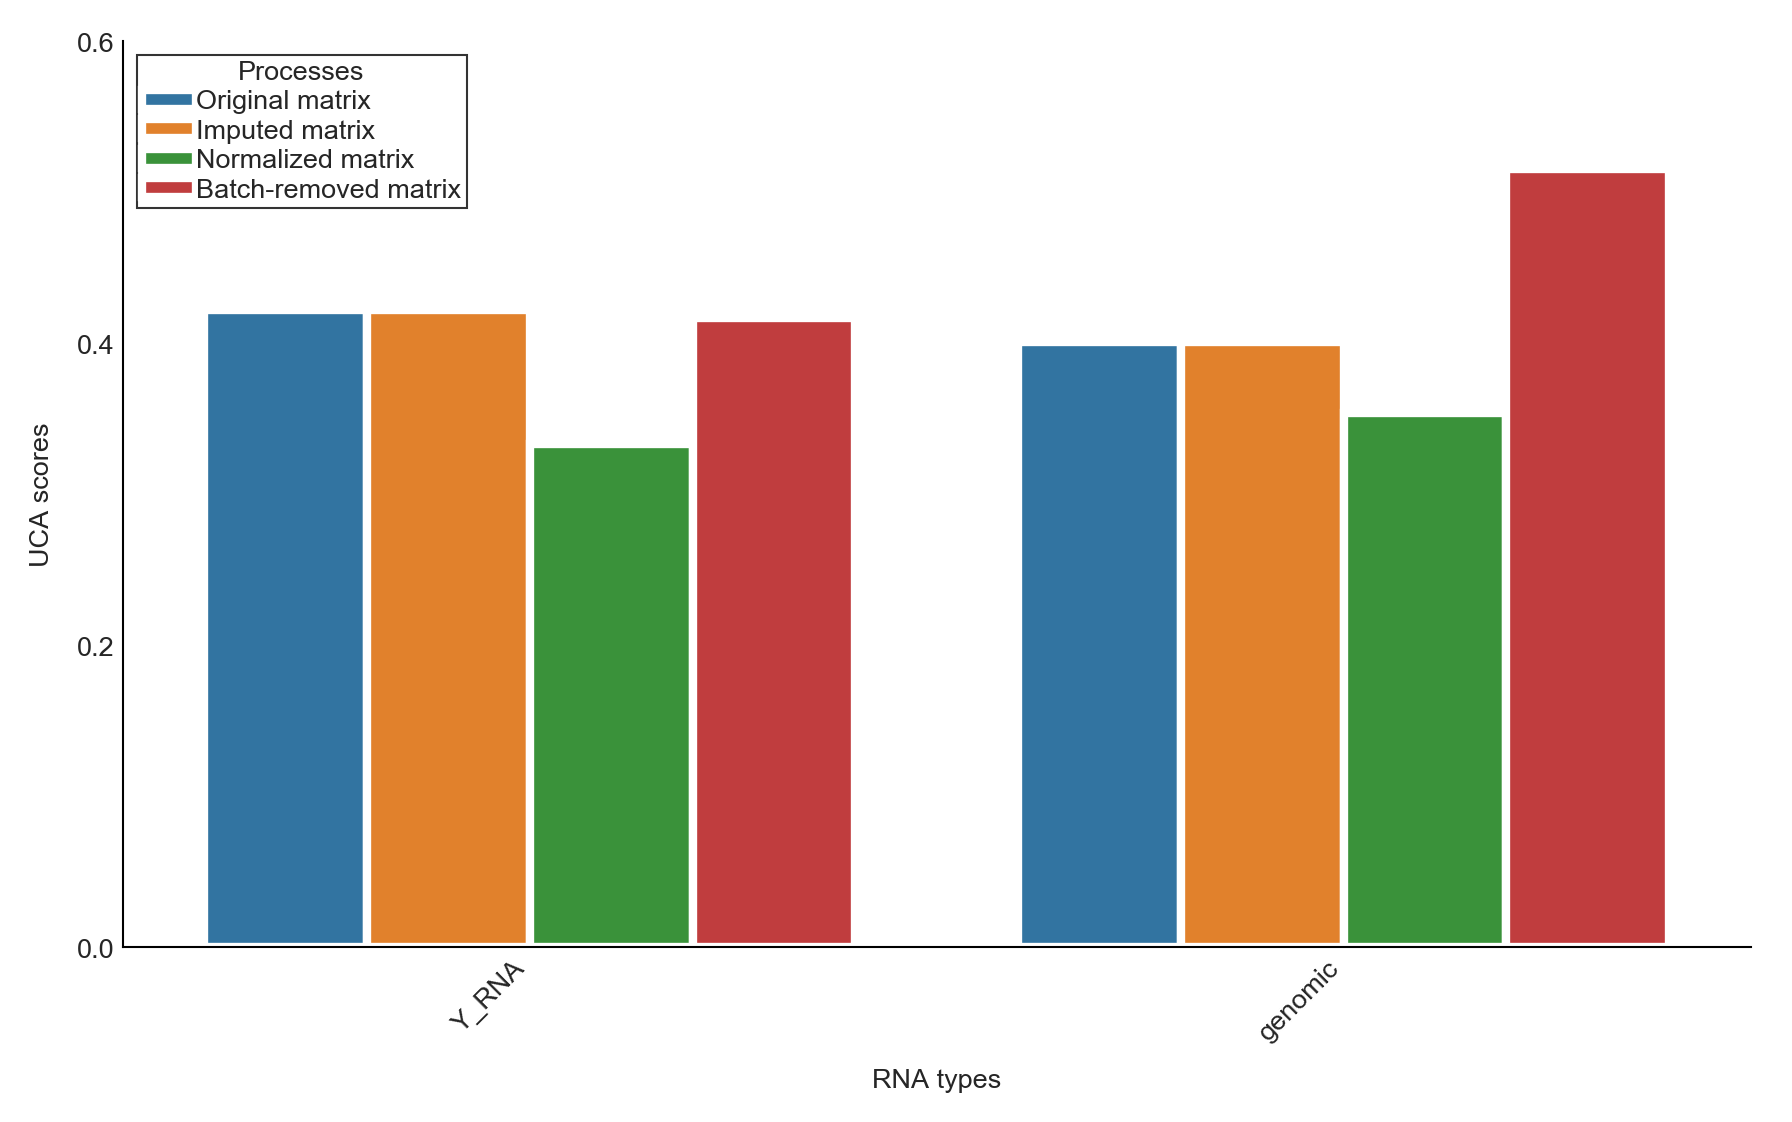

In [101]:
plt.rcParams['figure.dpi'] = 300
rnatype_list = unique([name.split('|')[1] for name in original_mx.index])

def get_mx_RNA_spec(table,rnatype):
    name_filter = np.where(array([name.split('|')[1] for name in table.index]) == rnatype)
    return table.iloc[name_filter]
merge = pd.DataFrame()
for rnatype in rnatype_list[:2]:
    original_mx_rna = get_mx_RNA_spec(original_mx,rnatype)
    impute_table_rna = get_mx_RNA_spec(impute_table,rnatype)
    normalize_table_rna = get_mx_RNA_spec(normalize_table,rnatype)
    batch_table_rna = get_mx_RNA_spec(batch_table,rnatype)
    fig,ucalist = visualize_effect_all(original_mx_rna, impute_table_rna, normalize_table_rna, batch_table_rna, sample_class,method='UMAP')
    ucalist.rename(columns={ ucalist.columns[0]: rnatype }, inplace=True)
    merge = pd.concat([merge,ucalist],axis=1)
    fig.savefig(savepath+rnatype+'_batch.eps')
    embed_pdf_figure(title=rnatype)
    
uca_rna_mx = merge
uca_rna_mx = uca_rna_mx.T.sort_values(by='Original matrix', ascending=False).T
uca_rna_mx.columns.name = 'rnatype'
uca_rna_stack = pd.DataFrame(uca_rna_mx.stack())
uca_rna_stack = uca_rna_stack.reset_index()
uca_rna_stack.rename(columns={ uca_rna_stack.columns[2]: "uca_score" }, inplace=True)
uca_rna_stack.rename(columns={ uca_rna_stack.columns[0]: "process" }, inplace=True)
fig,ax=plt.subplots(figsize=(7,4))
ax = sns.barplot(x="rnatype", y="uca_score", hue="process", data=uca_rna_stack)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
std_plot(ax,'RNA types','UCA scores',legendtitle='Processes',legendsort=False,borderpad=0.2,labelspacing=0.2)
fig.savefig(savepath+'UCAscores_of_RNA_batch.eps')
display_dataframe(uca_rna_mx, filename='uca_rna_mx')


In [69]:
ucalist

tucpRNA
Imputed matrix        0.385417
Original matrix       0.385417
Batch-removed matrix  0.354167
Normalized matrix     0.432292

In [71]:
merge = pd.DataFrame()

In [73]:
pd.concat([merge,ucalist],axis=1)

tucpRNA
Imputed matrix        0.385417
Original matrix       0.385417
Batch-removed matrix  0.354167
Normalized matrix     0.432292

In [173]:
uca_rna_mx = pd.DataFrame(data={},index=['a','b'])
uca_rna_mx
#uca_rna_mx['c'][1]=3

Empty DataFrame
Columns: []
Index: [a, b]

In [174]:
uca_rna_mx = pd.DataFrame(data={},columns=rnatype_list,index=['original_mx','impute_table','normalize_table','batch_table'])
uca_rna_mx

Y_RNA genomic lncRNA mRNA miRNA piRNA snRNA snoRNA srpRNA  \
original_mx       NaN     NaN    NaN  NaN   NaN   NaN   NaN    NaN    NaN   
impute_table      NaN     NaN    NaN  NaN   NaN   NaN   NaN    NaN    NaN   
normalize_table   NaN     NaN    NaN  NaN   NaN   NaN   NaN    NaN    NaN   
batch_table       NaN     NaN    NaN  NaN   NaN   NaN   NaN    NaN    NaN   

                tRNA tucpRNA  
original_mx      NaN     NaN  
impute_table     NaN     NaN  
normalize_table  NaN     NaN  
batch_table      NaN     NaN

In [204]:
uca_rna_mx = pd.DataFrame(data={},columns=rnatype_list,index=['Original matrix','Imputed matrix','Normalized matrix','Batch-removed matrix'])
for rnatype in rnatype_list:
    original_mx_rna = get_mx_RNA_spec(original_mx,rnatype)
    impute_table_rna = get_mx_RNA_spec(impute_table,rnatype)
    normalize_table_rna = get_mx_RNA_spec(normalize_table,rnatype)
    batch_table_rna = get_mx_RNA_spec(batch_table,rnatype)
    #uca_score = PCA_plot_with_uca_score_sns(ax,original_mx_rna,sample_class,method)
    uca_rna_mx[rnatype]['Original matrix'] = PCA_plot_with_uca_score_sns(ax,original_mx_rna,sample_class,method = 'UMAP')
    uca_rna_mx[rnatype]['Imputed matrix'] = PCA_plot_with_uca_score_sns(ax,impute_table_rna,sample_class,method = 'UMAP')
    uca_rna_mx[rnatype]['Normalized matrix'] = PCA_plot_with_uca_score_sns(ax,normalize_table_rna,sample_class,method = 'UMAP')
    uca_rna_mx[rnatype]['Batch-removed matrix'] = PCA_plot_with_uca_score_sns(ax,batch_table_rna,sample_class,method = 'UMAP')
    

In [205]:
uca_rna_mx


Y_RNA   genomic    lncRNA      mRNA     miRNA  \
Original matrix       0.421875  0.401042  0.395833  0.390625   0.40625   
Imputed matrix        0.421875  0.395833  0.395833  0.390625  0.385417   
Normalized matrix     0.338542  0.354167  0.354167  0.364583  0.296875   
Batch-removed matrix   0.40625  0.515625       0.5  0.463542  0.354167   

                         piRNA     snRNA    snoRNA    srpRNA      tRNA  \
Original matrix       0.505208  0.385417  0.421875   0.40625  0.401042   
Imputed matrix        0.395833  0.385417  0.427083   0.40625  0.401042   
Normalized matrix     0.380208  0.296875  0.307292  0.291667  0.401042   
Batch-removed matrix   0.34375  0.380208   0.40625  0.390625  0.427083   

                       tucpRNA  
Original matrix       0.385417  
Imputed matrix        0.385417  
Normalized matrix     0.354167  
Batch-removed matrix  0.453125

In [100]:
def display_dataframe(df, filename=None, encoding='utf-8', format='csv', type='button', **kwargs):
    display(df)
    if filename is None:
        filename = "dataframe"
    if format == 'csv':
        data = df.to_csv(**kwargs)
        mime_type = 'text/csv'
        filename = filename + '.csv'
    elif format == 'tsv':
        data = df.to_csv(sep='\t', **kwargs)
        mime_type = 'text/plain'
        filename = filename + '.txt'
    else:
        raise ValueError('unknown file format: {}'.format(format))
    data = 'data:{mime_type};base64,'.format(mime_type=mime_type) + str(b64encode(bytes(data, encoding=encoding)), encoding=encoding)
    if type == 'hyperlink':
        display(HTML('<a href="{data}" download={filename} target="_blank">{filename}</a>'.format(
            mime_type=mime_type, filename=filename, data=data)))
    elif type == 'button':
        button_id = 'button_{}'.format(np.random.randint(1000000000))
        display(HTML(r'<input type="button" id="{0}" value="Download">'.format(button_id)))
        display(HTML('''<script>
    document.getElementById("{button_id}").addEventListener("click", function(event){{
        var filename = "{filename}";
        var data = "{data}";
        const element = document.createElement('a');
        element.setAttribute('href', data);
        element.setAttribute('download', filename);
        element.style.display = 'none';
        document.body.appendChild(element);
        element.click();
        document.body.removeChild(element);
    }});
</script>'''.format(button_id=button_id, filename=filename, data=data)))

In [23]:
def get_clustering_score(data,sampleclass,method = 'PCA',prediction_algorithm='knn'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    #X_pca = transform.fit_transform(X)
    X_, y_ = X, sampleclass.loc[data.columns.values].values.ravel() 
    #knn_score_ = knn_score(X_, y_)
    #asw_score, nmi_score, ari_score, uca_score = clustering_scores(X_, y_, prediction_algorithm)
    uca_score = uca_scores(X_, y_, prediction_algorithm)
    return uca_score

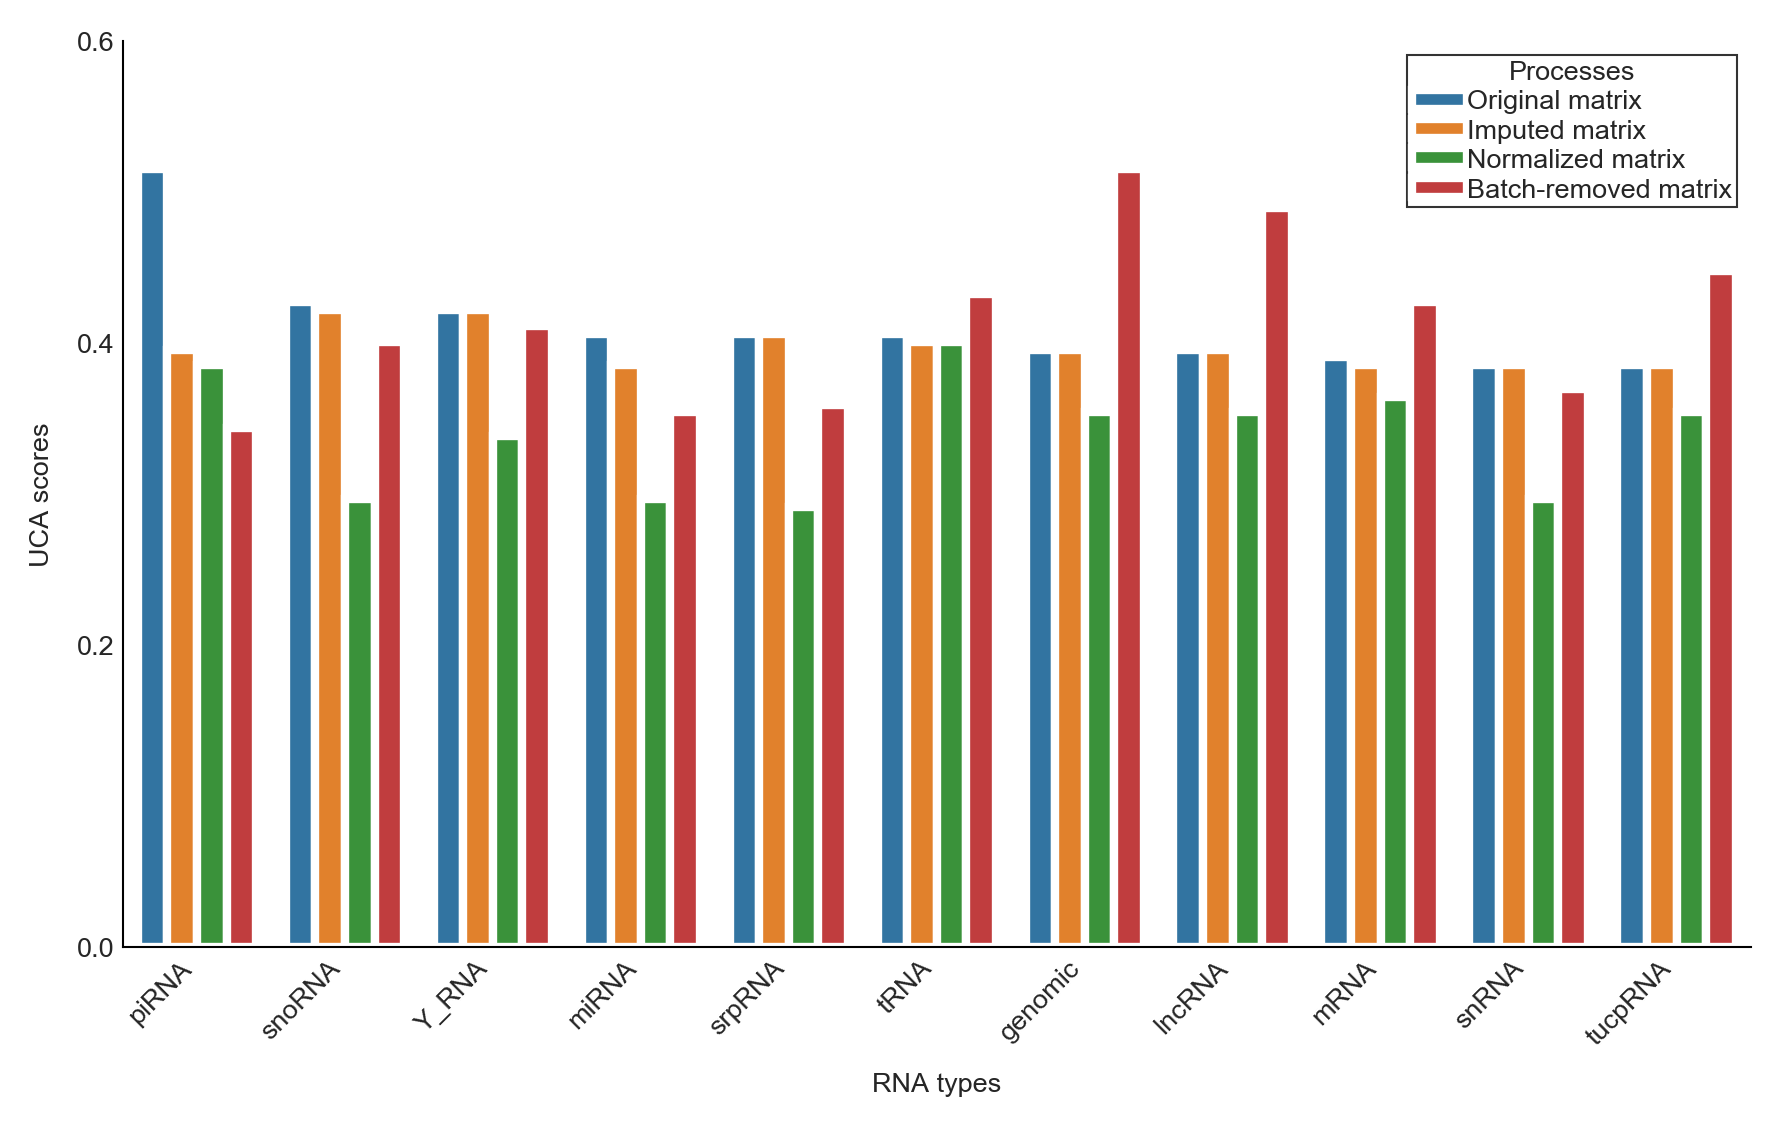

In [20]:
uca_rna_mx = pd.DataFrame(data={},columns=rnatype_list,index=['Original matrix','Imputed matrix','Normalized matrix','Batch-removed matrix'])
f,a=plt.subplots()
for rnatype in rnatype_list:
    original_mx_rna = get_mx_RNA_spec(original_mx,rnatype)
    impute_table_rna = get_mx_RNA_spec(impute_table,rnatype)
    normalize_table_rna = get_mx_RNA_spec(normalize_table,rnatype)
    batch_table_rna = get_mx_RNA_spec(batch_table,rnatype)
    #uca_score = PCA_plot_with_uca_score_sns(ax,original_mx_rna,sample_class,method)
    ucalist.rename(columns={ ucalist.columns[0]: "counts" }, inplace=True)
    
    uca_rna_mx[rnatype]['Original matrix'] = PCA_plot_with_uca_score_sns(a,original_mx_rna,sample_class,method = 'UMAP')
    uca_rna_mx[rnatype]['Imputed matrix'] = PCA_plot_with_uca_score_sns(a,impute_table_rna,sample_class,method = 'UMAP')
    uca_rna_mx[rnatype]['Normalized matrix'] = PCA_plot_with_uca_score_sns(a,normalize_table_rna,sample_class,method = 'UMAP')
    uca_rna_mx[rnatype]['Batch-removed matrix'] = PCA_plot_with_uca_score_sns(a,batch_table_rna,sample_class,method = 'UMAP')
uca_rna_mx = uca_rna_mx.T.sort_values(by='Original matrix', ascending=False).T
uca_rna_mx.columns.name = 'rnatype'
uca_rna_stack = pd.DataFrame(uca_rna_mx.stack())
uca_rna_stack = uca_rna_stack.reset_index()
uca_rna_stack.rename(columns={ uca_rna_stack.columns[2]: "uca_score" }, inplace=True)
uca_rna_stack.rename(columns={ uca_rna_stack.columns[0]: "process" }, inplace=True)
fig,ax=plt.subplots(figsize=(7,4))
ax = sns.barplot(x="rnatype", y="uca_score", hue="process", data=uca_rna_stack)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
std_plot(ax,'RNA types','UCA scores',legendtitle='Processes',legendsort=False,borderpad=0.2,labelspacing=0.2)
fig.savefig(savepath+'UCAscores_of_RNA_batch.eps')

In [218]:
uca_rna_mx = uca_rna_mx.T.sort_values(by='Original matrix', ascending=False).T

In [219]:
uca_rna_mx.columns.name = 'rnatype'
uca_rna_stack = pd.DataFrame(uca_rna_mx.stack())
uca_rna_stack = uca_rna_stack.reset_index()
uca_rna_stack.rename(columns={ uca_rna_stack.columns[2]: "uca_score" }, inplace=True)
uca_rna_stack.rename(columns={ uca_rna_stack.columns[0]: "process" }, inplace=True)

In [220]:
uca_rna_stack

process  rnatype uca_score
0        Original matrix    piRNA  0.505208
1        Original matrix    Y_RNA  0.421875
2        Original matrix   snoRNA  0.421875
3        Original matrix    miRNA   0.40625
4        Original matrix   srpRNA   0.40625
5        Original matrix  genomic  0.401042
6        Original matrix     tRNA  0.401042
7        Original matrix   lncRNA  0.395833
8        Original matrix     mRNA  0.390625
9        Original matrix    snRNA  0.385417
10       Original matrix  tucpRNA  0.385417
11        Imputed matrix    piRNA  0.395833
12        Imputed matrix    Y_RNA  0.421875
13        Imputed matrix   snoRNA  0.427083
14        Imputed matrix    miRNA  0.385417
15        Imputed matrix   srpRNA   0.40625
16        Imputed matrix  genomic  0.395833
17        Imputed matrix     tRNA  0.401042
18        Imputed matrix   lncRNA  0.395833
19        Imputed matrix     mRNA  0.390625
20        Imputed matrix    snRNA  0.385417
21        Imputed matrix  tucpRNA  0.385417
22     Normalized matrix    piRNA  0.380208
23     Normalized matrix    Y_RNA  0.338542
24     Normalized matrix   snoRNA  0.307292
25     Normalized matrix    miRNA  0.296875
26     Normalized matrix   srpRNA  0.291667
27     Normalized matrix  genomic  0.354167
28     Normalized matrix     tRNA  0.401042
29     Normalized matrix   lncRNA  0.354167
30     Normalized matrix     mRNA  0.364583
31     Normalized matrix    snRNA  0.296875
32     Normalized matrix  tucpRNA  0.354167
33  Batch-removed matrix    piRNA   0.34375
34  Batch-removed matrix    Y_RNA   0.40625
35  Batch-removed matrix   snoRNA   0.40625
36  Batch-removed matrix    miRNA  0.354167
37  Batch-removed matrix   srpRNA  0.390625
38  Batch-removed matrix  genomic  0.515625
39  Batch-removed matrix     tRNA  0.427083
40  Batch-removed matrix   lncRNA       0.5
41  Batch-removed matrix     mRNA  0.463542
42  Batch-removed matrix    snRNA  0.380208
43  Batch-removed matrix  tucpRNA  0.453125

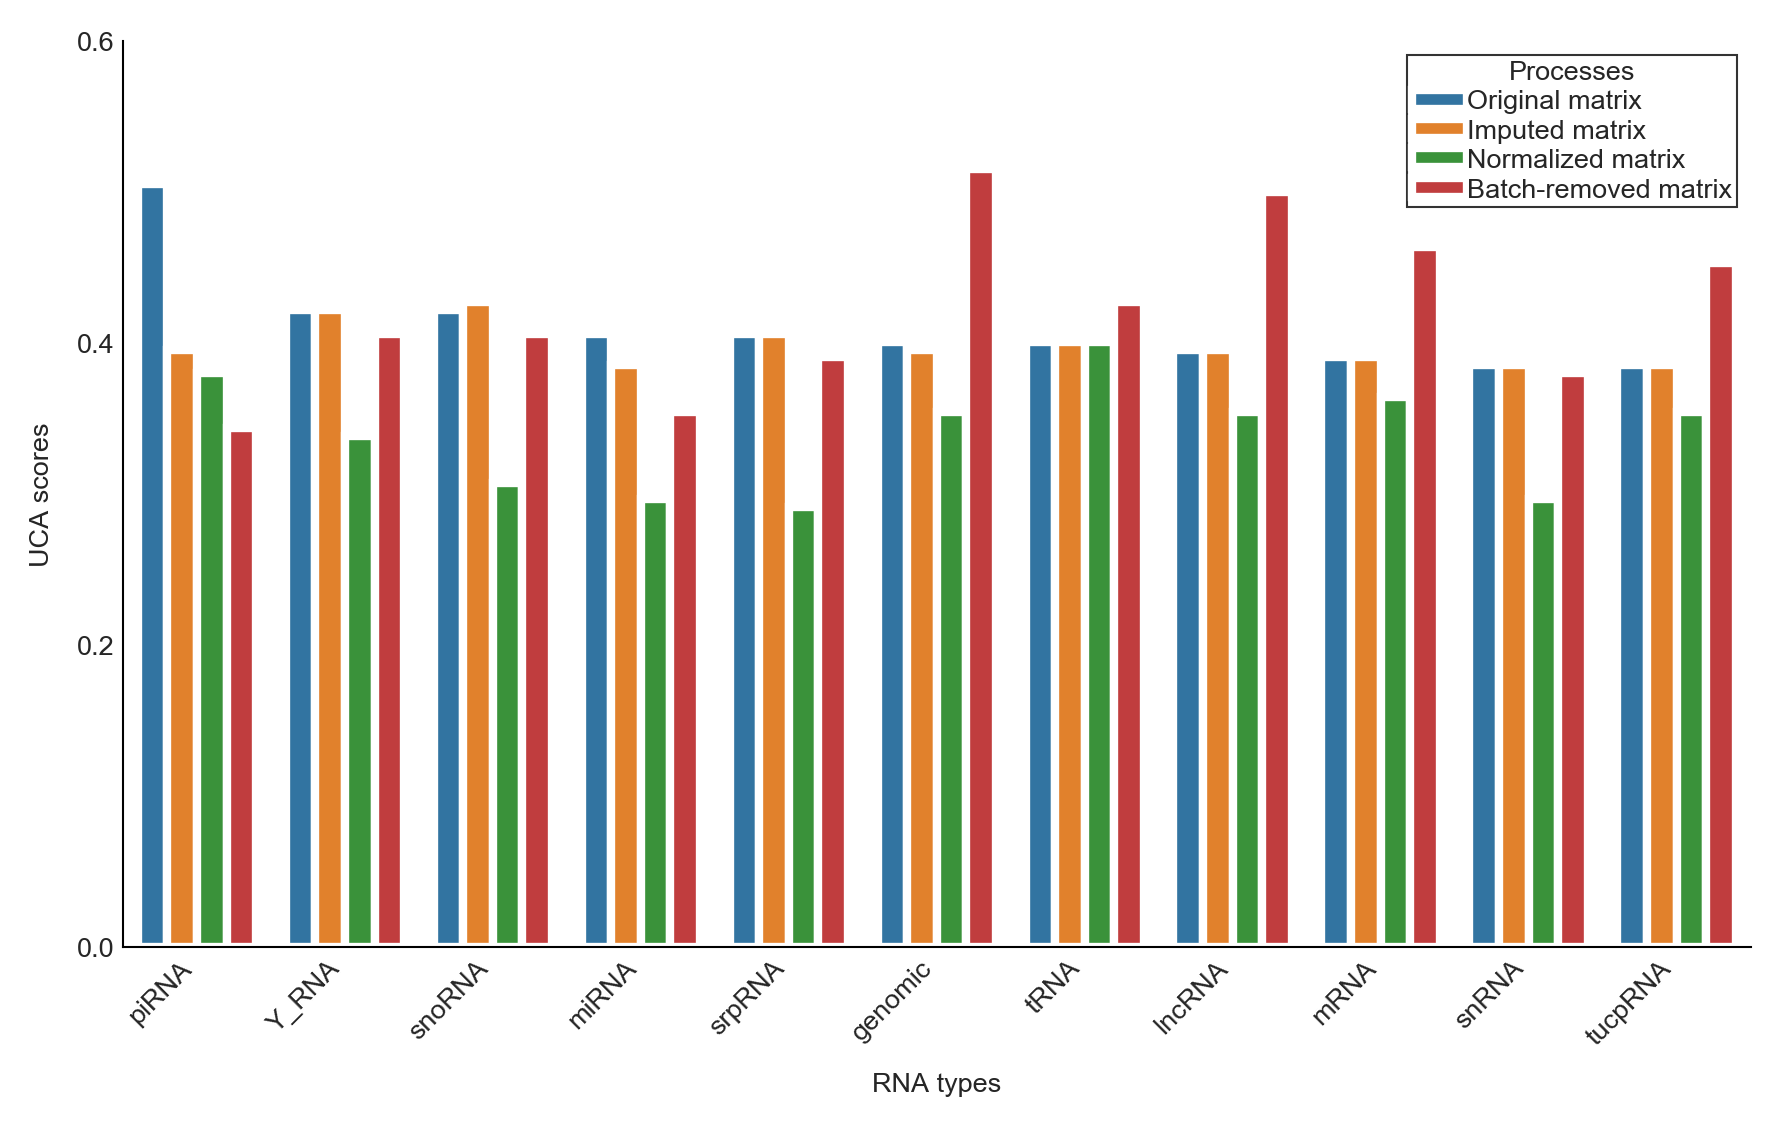

In [222]:
fig,ax=plt.subplots(figsize=(7,4))
ax = sns.barplot(x="rnatype", y="uca_score", hue="process", data=uca_rna_stack)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
std_plot(ax,'RNA types','UCA scores',legendtitle='Processes',legendsort=False,borderpad=0.2,labelspacing=0.2)
fig.savefig(savepath+'UCAscores_of_RNA_batch.eps')

In [202]:
vars(ax.get_xticklabels)

{}

# my attempt

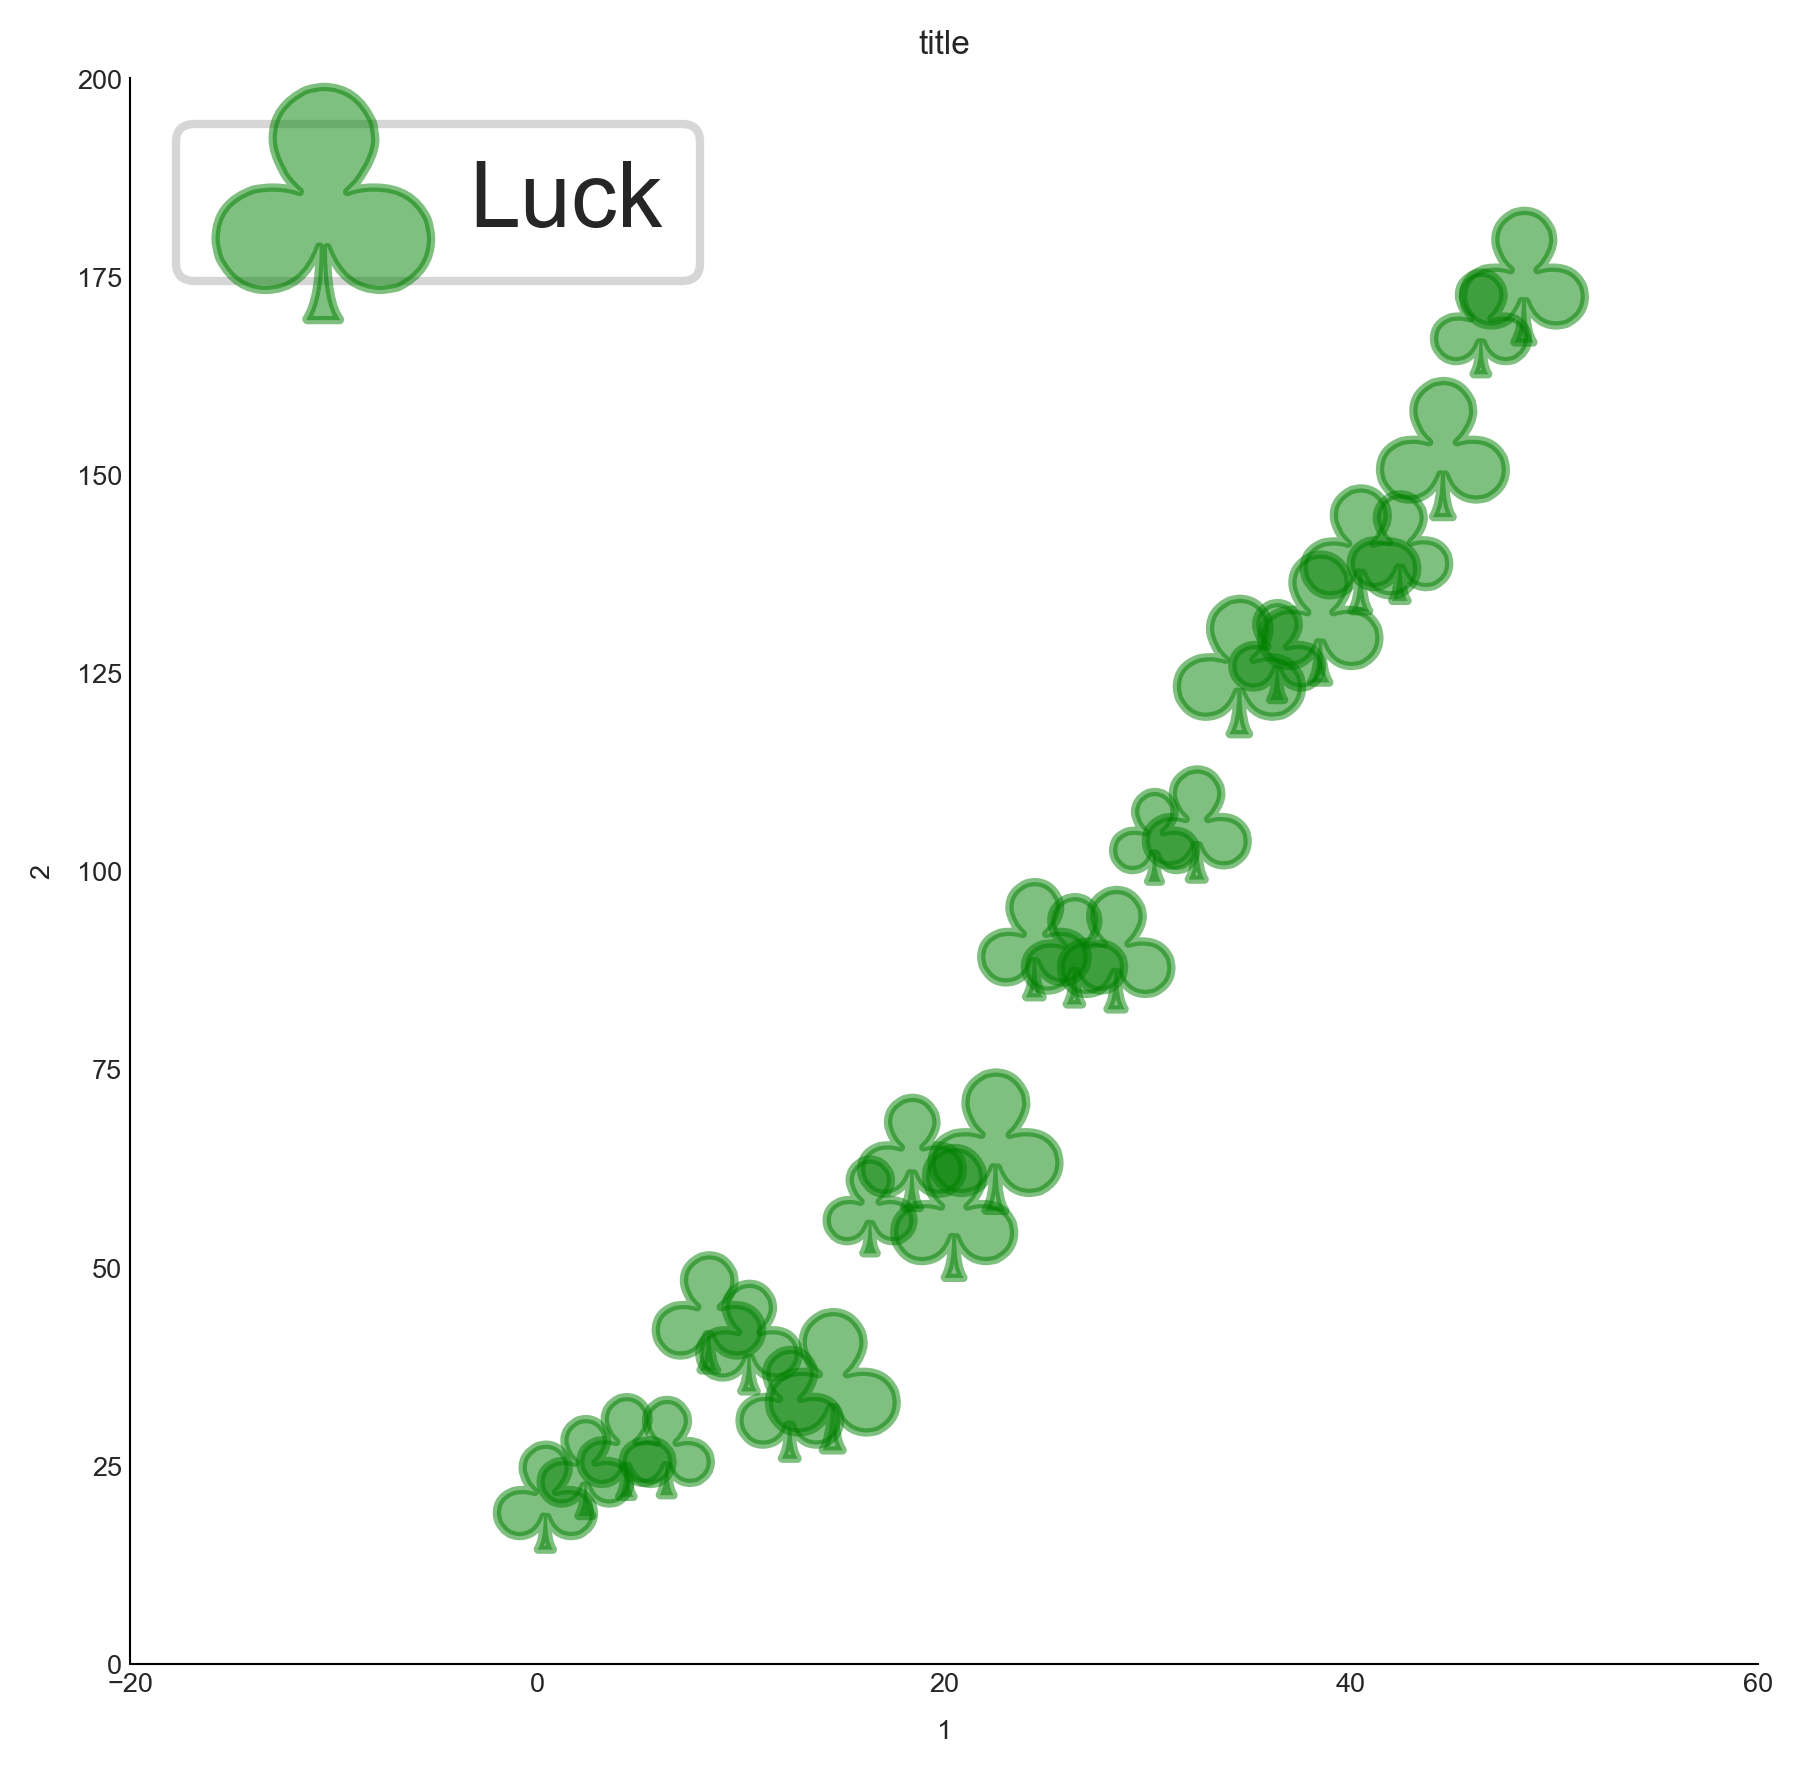

In [130]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500
fig,ax = plt.subplots(figsize=(7,7))
ax.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")

ax.legend(loc='upper left')
std_plot(ax,'1','2','title',legendtitle='None',legendsort=False)
ax.legend(markerscale=2)

In [116]:
h,l = ax.get_legend_handles_labels()

In [110]:
h = h.append('-')

In [112]:
l = l.append('1')

In [118]:
h

In [120]:
get_legend_handler_map(ax)

NameError: name 'get_legend_handler_map' is not defined

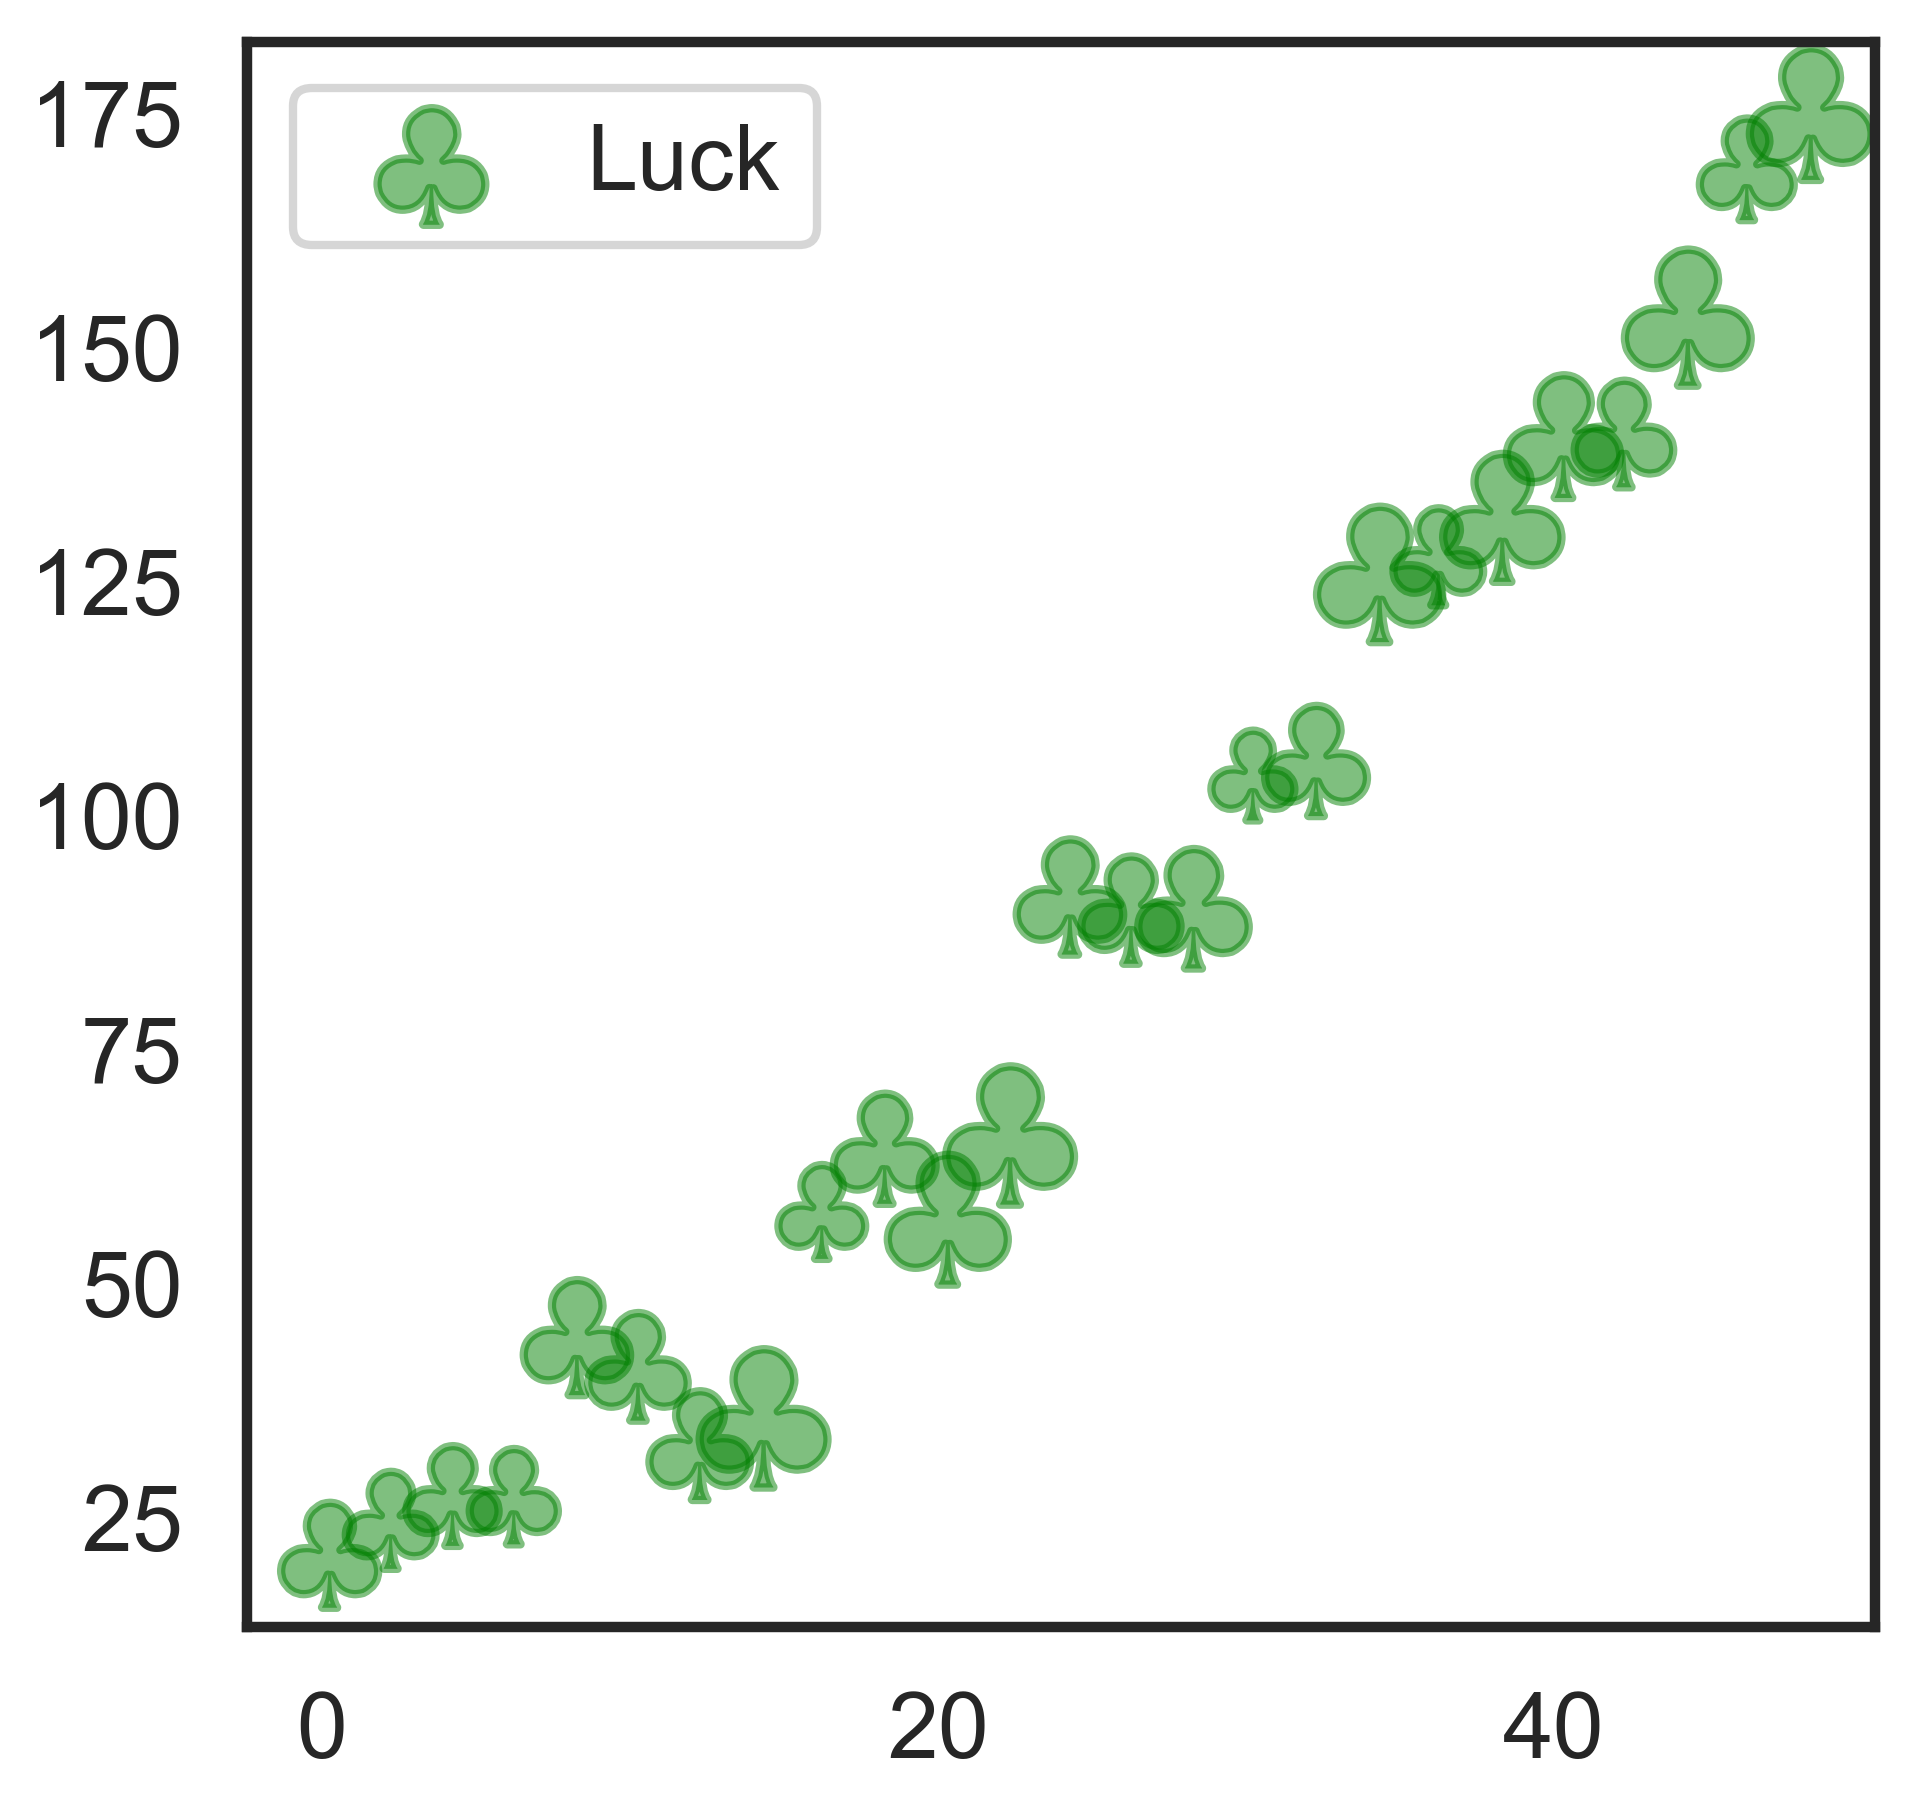

In [107]:
fig

In [125]:
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.8 , box.height* 0.8])
ax.legend(loc='center left', bbox_to_anchor=(0.2, 1.12),ncol=3)


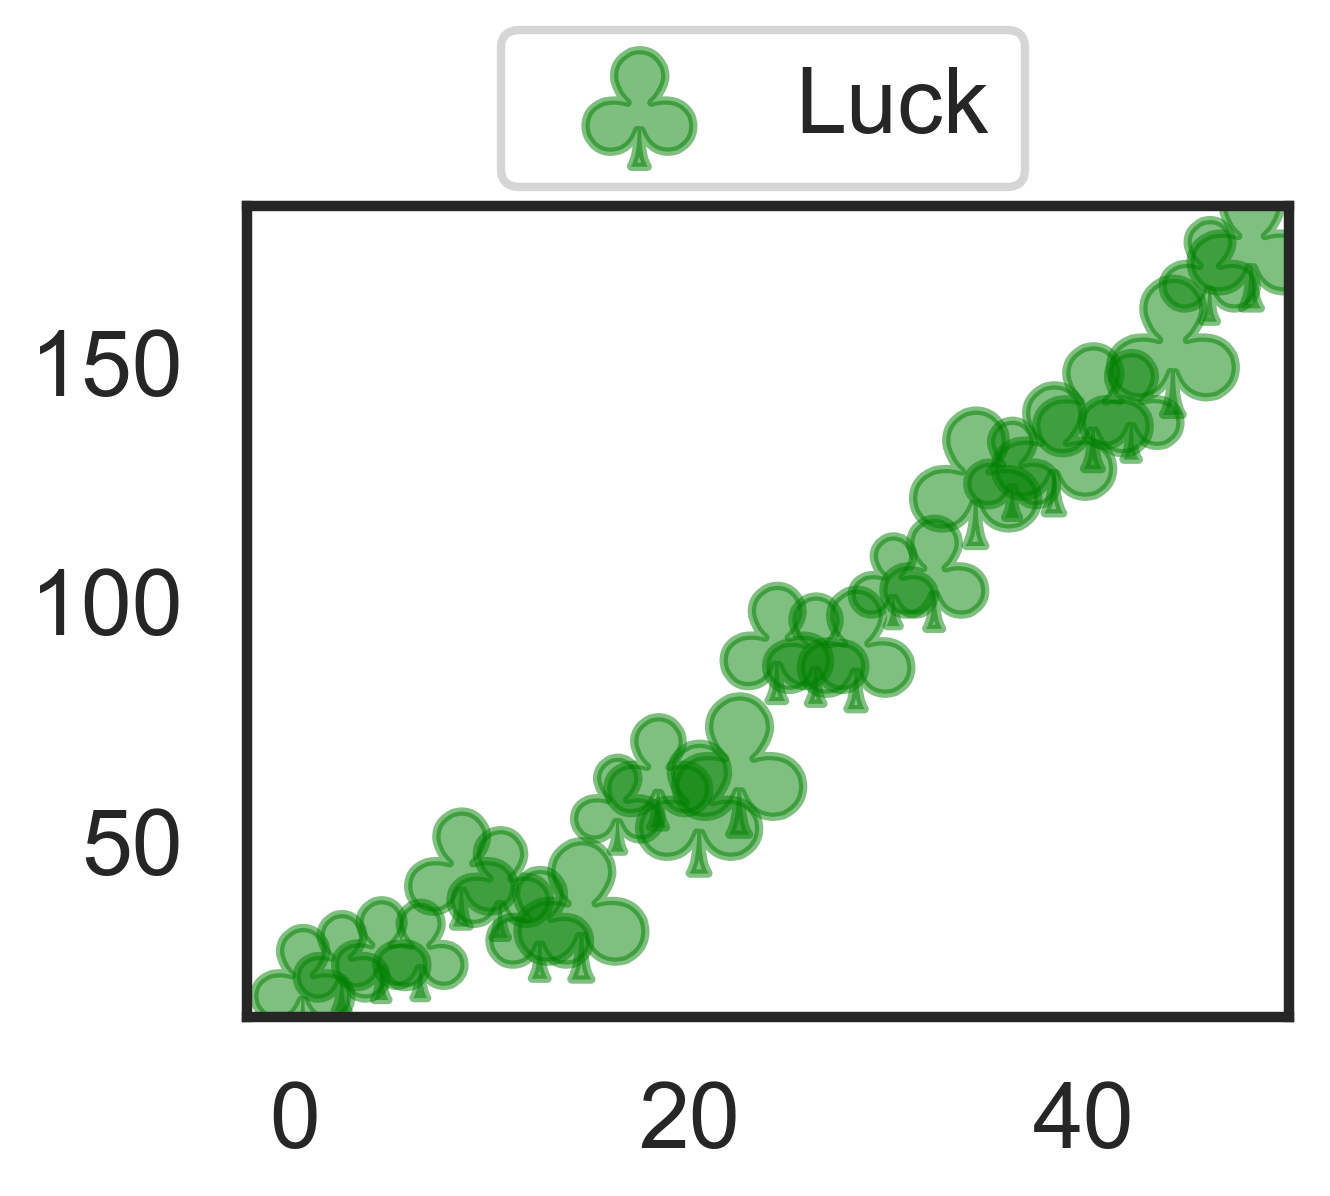

In [126]:
fig